In [1]:
#import necessary libraries
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the dataset and store it as a dataframe
df=pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wbcc            294 non-null    float64
 17  rbcc            269 non-null    flo

In [6]:
# finding the categorical and numerical attributes
cat_cols=[col for col in df.columns if df[col].dtype=='object']
num_cols=[col for col in df.columns if df[col].dtype!='object']


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'sg'}>,
        <AxesSubplot:title={'center':'al'}>],
       [<AxesSubplot:title={'center':'su'}>,
        <AxesSubplot:title={'center':'bgr'}>,
        <AxesSubplot:title={'center':'bu'}>,
        <AxesSubplot:title={'center':'sc'}>],
       [<AxesSubplot:title={'center':'sod'}>,
        <AxesSubplot:title={'center':'pot'}>,
        <AxesSubplot:title={'center':'hemo'}>,
        <AxesSubplot:title={'center':'pcv'}>],
       [<AxesSubplot:title={'center':'wbcc'}>,
        <AxesSubplot:title={'center':'rbcc'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

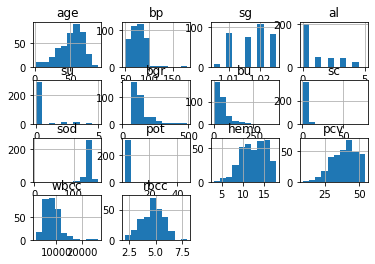

In [7]:
df.hist(column=num_cols)

In [254]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [1 0] values

pc has [1 0] values

pcc has [0 1] values

ba has [0 1] values

htn has [1 0] values

dm has [1 0] values

cad has [0 1] values

appet has [0 1] values

pe has [0 1] values

ane has [0 1] values

classification has [0 1] values



In [9]:
df['dm'].replace(to_replace={'\tno':'no',' yes':'yes','\tyes':'yes','yes':'yes'},inplace=True)

df['cad']=df['cad'].replace(to_replace='\tno',value='no')

df['classification']=df['classification'].replace(to_replace={'ckd\t':"ckd","ckd":'ckd','notckd':'not ckd'})

In [10]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' nan] values

cad has ['no' 'yes' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values

classification has ['ckd' 'not ckd'] values



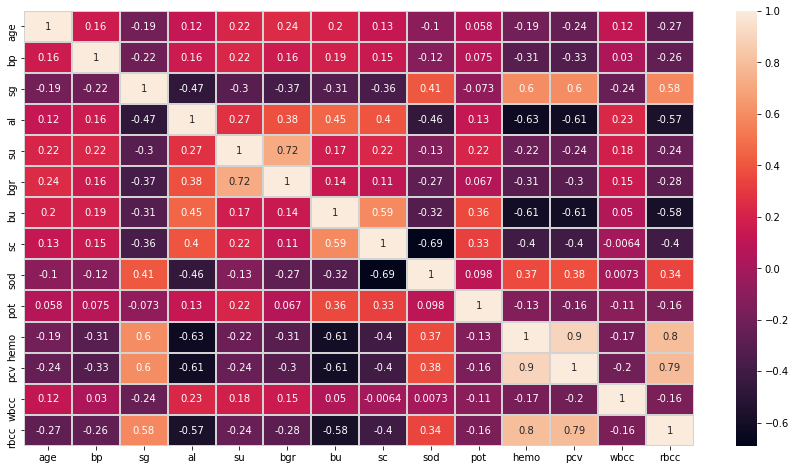

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=2,linecolor='lightgrey')
plt.show()

In [12]:
df.isna().sum().sort_values(ascending=False)

rbc               152
rbcc              131
wbcc              106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [13]:
df[num_cols].isnull().sum()

age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wbcc    106
rbcc    131
dtype: int64

In [14]:
df[cat_cols].isnull().sum()

rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [15]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [16]:

for col in num_cols:
    random_value_imputation(col)

In [17]:
df[num_cols].isnull().sum()

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wbcc    0
rbcc    0
dtype: int64

In [18]:
for col in cat_cols:
    impute_mode(col)

In [19]:
df[cat_cols].isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [20]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 2 categories

cad has 2 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories

classification has 2 categories



In [21]:
#Encoding the catgorical attributes to binary attributes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,130.0,...,38.0,6000.0,4.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.7,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [22]:
ind_col = [col for col in df.columns if col != 'classification']
dep_col = 'classification'

X = df[ind_col]
y = df[dep_col]


In [23]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50,random_state=0)


In [24]:
from sklearn.metrics import precision_score,f1_score,recall_score,roc_auc_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [255]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(X_train,y_train,X_test,y_test):
    knn = KNeighborsClassifier( algorithm='ball_tree',leaf_size=25,n_neighbors= 5,p= 2,weights='uniform')
    knn.fit(X_train,y_train)
    Y_pred_knn = knn.predict(X_test)
#accuracy_score(y_test, preds)

    cm=confusion_matrix(y_test,Y_pred_knn)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
    disp.plot()
    plt.show()

    metric=Evaluate(y_test,Y_pred_knn)
    return metric
from sklearn.ensemble import RandomForestClassifier

def RF(X_train,y_train,X_test,y_test):
    rd_clf = RandomForestClassifier()
    rd_clf.fit(X_train, y_train)
    Y_pred_rf=rd_clf.predict(X_test)
    print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")
    cm=confusion_matrix(y_test,Y_pred_rf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rd_clf.classes_)
    disp.plot()
    plt.show()
    metric=Evaluate(y_test,Y_pred_rf)
    return metric


from sklearn.linear_model import LogisticRegression

def LR(X_train,y_train,X_test,y_test):
    logreg = LogisticRegression(max_iter=10000)
    logreg.fit(X_train,y_train)
    Y_pred_lr=logreg.predict(X_test)

    print(f"Classification Report :- \n {classification_report(y_test, logreg.predict(X_test))}")
    cm=confusion_matrix(y_test,Y_pred_lr)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
    disp.plot()
    plt.show()
    log_acc=accuracy_score(Y_pred_lr,y_test)*100

    metric=Evaluate(y_test,Y_pred_lr)
    return metric

from sklearn.svm import LinearSVC
def LSVM_L2(X_train,y_train,X_test,y_test):
    LSVM_L2=LinearSVC(C=1, loss='hinge',penalty= 'l2', tol=0.001,max_iter=100000)
    LSVM_L2.fit(X_train,y_train)
    Y_pred_l2 = LSVM_L2.predict(X_test)

    print(f"Classification Report :- \n {classification_report(y_test, LSVM_L2.predict(X_test))}")
    cm=confusion_matrix(y_test,Y_pred_l2)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LSVM_L2.classes_)
    disp.plot()
    plt.show()
    
    LSVM_L2_metric=Evaluate(y_test,Y_pred_l2)
    
    return LSVM_L2_metric


def LSVM_L1(X_train,y_train,X_test,y_test):
    
    LSVM_L1=LinearSVC(penalty='l1',loss="squared_hinge", dual=False, tol=1e-3)
    LSVM_L1.fit(X_train,y_train)


    Y_pred_l1 = LSVM_L1.predict(X_test)
    #print(f"Classification Report :- \n {classification_report(y_test, LSVM_L1.predict(X_test))}")
    cm=confusion_matrix(y_test,Y_pred_l1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LSVM_L1.classes_)
    disp.plot()
    plt.show()
    LSVM_L1_metric=Evaluate(y_test,Y_pred_l1)
    return LSVM_L1_metric



from sklearn.tree import DecisionTreeClassifier

def C50(X_train,y_train,X_test,y_test):
    dt=DecisionTreeClassifier(criterion='entropy')
    dt.fit(X_train,y_train)
    Y_pred_dt=dt.predict(X_test)
    print(f"Classification Report :- \n {classification_report(y_test, dt.predict(X_test))}")

    cm=confusion_matrix(y_test,Y_pred_dt)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
    disp.plot()
    plt.show()
    C50_metric=Evaluate(y_test,Y_pred_dt)
    return C50_metric


def ANN(X_train,y_train,X_test,y_test,inp_dim):
    
    model_S = Sequential()
    model_S.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = inp_dim))
    model_S.add(Dropout(rate = 0.1))
    model_S.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    model_S.add(Dropout(rate = 0.1))
    model_S.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    model_S.add(Dropout(rate = 0.1))
    model_S.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    model_S.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    model_S.summary()
    history = model_S.fit(X_train,y_train,epochs=250,batch_size=10,verbose=2,validation_split=0.5)

    yp = model_S.predict(X_test)
    y_pred = []
    for element in yp:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

    cm=confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    Ann=Evaluate(y_test,y_pred)
    return Ann


def CHAID(df_train,X_test,y_test):
    
    config = {"algorithm": "CHAID"}
    tree = cb.fit(df_train,config,target_label='classification')
    y_pred=[]
    c=0

    for i in y_test:
        x1=cb.predict(tree,X_test.iloc[c])
        if x1 > 0.6:
            y_pred.append(1)
        else:
            y_pred.append(0)
        c=c+1
    print(classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    chaid_acc=accuracy_score(y_pred,y_test)*100
    Chaid_metric=Evaluate(y_test,y_pred)
    return Chaid_metric

In [65]:
parameters = {'penalty':['l2'],'loss':['hinge','sqaured_hinge'] ,'C':[0.1,0.5,1,10,100],'max_iter':[100000],'tol':[1e-3]}
svc = LinearSVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)
clf.best_params_

C:\Users\SIVASAI\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\SIVASAI\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\SIVASAI\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\SIVASAI\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\SIVASAI\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\SIVASAI\AppData\Roaming\Python\

{'C': 1, 'loss': 'hinge', 'max_iter': 100000, 'penalty': 'l2', 'tol': 0.001}

In [34]:


def Evaluate(Y_Test, Predictions):
    
   
    Accuracy = accuracy_score(Y_Test, Predictions)
    
    Precision = precision_score(Y_Test, Predictions)
    
    Recall = recall_score(Y_Test, Predictions)
    
    F1 = f1_score(Y_Test, Predictions)
    Auc=roc_auc_score(Y_Test,Predictions)
    Gini=2*(Auc)-1
    Metric = {'Accuracy Score' : round(Accuracy,2), 
              
              'Precision Score' : round(Precision,2),
              
              'Recall Score' : round(Recall,2),
              
              'F1 Score' : round(F1,2),
              'AUC'  :  round(Auc,2),
              'GINI': round(Gini,2)
             }
    
    print(f'Accuracy Score : {Accuracy * 100:.2f}%')
    
    print(f'Precision Score : {Precision * 100:.2f}%')
    
    print(f'Recall Score : {Recall * 100:.2f}%')
    
    print(f'F1 Score : {F1 * 100:.2f}%')
    
    print(f'AUC :{Auc*100:2f}%')
    
    print(f'GINI :{Gini}%')
    
    return Metric

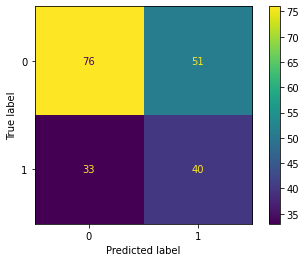

Accuracy Score : 58.00%
Precision Score : 43.96%
Recall Score : 54.79%
F1 Score : 48.78%
AUC :57.318520%
GINI :0.14637040232984577%


In [35]:

Knn_metric=KNN(X_train,y_train,X_test,y_test)


Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       127
           1       0.97      0.95      0.96        73

    accuracy                           0.97       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.97      0.97      0.97       200



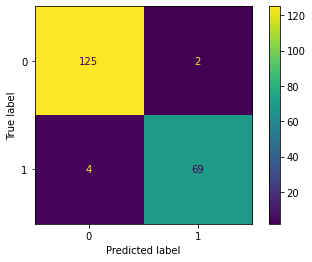

Accuracy Score : 97.00%
Precision Score : 97.18%
Recall Score : 94.52%
F1 Score : 95.83%
AUC :96.472872%
GINI :0.9294574479559918%


In [36]:
RF_metric=RF(X_train,y_train,X_test,y_test)

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       127
           1       0.92      0.93      0.93        73

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



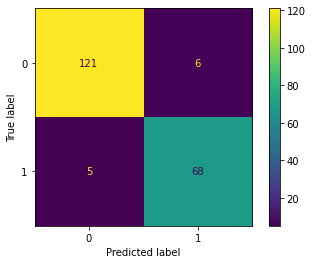

Accuracy Score : 94.50%
Precision Score : 91.89%
Recall Score : 93.15%
F1 Score : 92.52%
AUC :94.213138%
GINI :0.8842627548268793%


In [37]:
Log_metric=LR(X_train,y_train,X_test,y_test)

C:\Users\SIVASAI\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       127
           1       0.87      0.74      0.80        73

    accuracy                           0.86       200
   macro avg       0.87      0.84      0.85       200
weighted avg       0.87      0.86      0.86       200



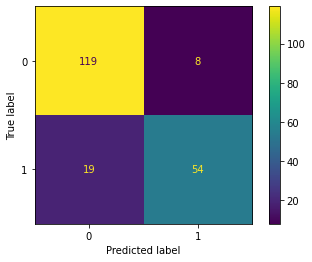

Accuracy Score : 86.50%
Precision Score : 87.10%
Recall Score : 73.97%
F1 Score : 80.00%
AUC :83.836695%
GINI :0.6767339014130083%


In [67]:
LSVM_L2_metric=LSVM_L2(X_train,y_train,X_test,y_test)

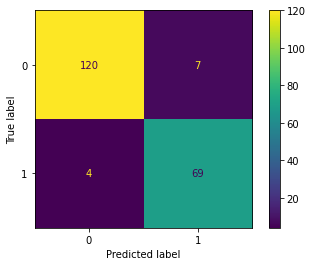

Accuracy Score : 94.50%
Precision Score : 90.79%
Recall Score : 94.52%
F1 Score : 92.62%
AUC :94.504368%
GINI :0.8900873692158344%


In [40]:
LSVM_L1_metric=LSVM_L1(X_train,y_train,X_test,y_test)

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       127
           1       0.92      0.92      0.92        73

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



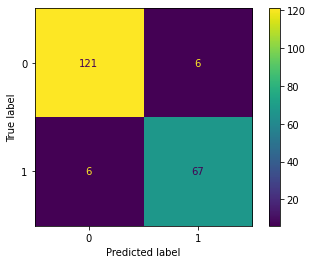

Accuracy Score : 94.00%
Precision Score : 91.78%
Recall Score : 91.78%
F1 Score : 91.78%
AUC :93.528206%
GINI :0.8705641246898932%


In [44]:
C50_metric=C50(X_train,y_train,X_test,y_test)

In [45]:
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [46]:
import keras as k
from keras.layers import Dropout

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                800       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                

Epoch 56/250
10/10 - 0s - loss: 0.3608 - accuracy: 0.8500 - val_loss: 0.4278 - val_accuracy: 0.7600 - 201ms/epoch - 20ms/step
Epoch 57/250
10/10 - 0s - loss: 0.3838 - accuracy: 0.8300 - val_loss: 0.3295 - val_accuracy: 0.8600 - 200ms/epoch - 20ms/step
Epoch 58/250
10/10 - 0s - loss: 0.3562 - accuracy: 0.8400 - val_loss: 0.3869 - val_accuracy: 0.7600 - 319ms/epoch - 32ms/step
Epoch 59/250
10/10 - 0s - loss: 0.4313 - accuracy: 0.7600 - val_loss: 0.3211 - val_accuracy: 0.8600 - 243ms/epoch - 24ms/step
Epoch 60/250
10/10 - 0s - loss: 0.3741 - accuracy: 0.8300 - val_loss: 0.4253 - val_accuracy: 0.7500 - 328ms/epoch - 33ms/step
Epoch 61/250
10/10 - 0s - loss: 0.4087 - accuracy: 0.8200 - val_loss: 0.5097 - val_accuracy: 0.7100 - 287ms/epoch - 29ms/step
Epoch 62/250
10/10 - 0s - loss: 0.4419 - accuracy: 0.7700 - val_loss: 0.3628 - val_accuracy: 0.8500 - 314ms/epoch - 31ms/step
Epoch 63/250
10/10 - 0s - loss: 0.3296 - accuracy: 0.8500 - val_loss: 0.3823 - val_accuracy: 0.7800 - 311ms/epoch - 31

Epoch 121/250
10/10 - 0s - loss: 0.2548 - accuracy: 0.8800 - val_loss: 0.4005 - val_accuracy: 0.7800 - 293ms/epoch - 29ms/step
Epoch 122/250
10/10 - 0s - loss: 0.2859 - accuracy: 0.8800 - val_loss: 0.3136 - val_accuracy: 0.8500 - 251ms/epoch - 25ms/step
Epoch 123/250
10/10 - 0s - loss: 0.2209 - accuracy: 0.9400 - val_loss: 0.2728 - val_accuracy: 0.8700 - 175ms/epoch - 17ms/step
Epoch 124/250
10/10 - 0s - loss: 0.2338 - accuracy: 0.9200 - val_loss: 0.2723 - val_accuracy: 0.8800 - 180ms/epoch - 18ms/step
Epoch 125/250
10/10 - 0s - loss: 0.2023 - accuracy: 0.9400 - val_loss: 0.2869 - val_accuracy: 0.8700 - 175ms/epoch - 17ms/step
Epoch 126/250
10/10 - 0s - loss: 0.2242 - accuracy: 0.9100 - val_loss: 0.7618 - val_accuracy: 0.7400 - 193ms/epoch - 19ms/step
Epoch 127/250
10/10 - 0s - loss: 0.2666 - accuracy: 0.8700 - val_loss: 0.2717 - val_accuracy: 0.8600 - 173ms/epoch - 17ms/step
Epoch 128/250
10/10 - 0s - loss: 0.2057 - accuracy: 0.9200 - val_loss: 0.3269 - val_accuracy: 0.8600 - 178ms/ep

Epoch 186/250
10/10 - 0s - loss: 0.1340 - accuracy: 0.9400 - val_loss: 0.2119 - val_accuracy: 0.9200 - 178ms/epoch - 18ms/step
Epoch 187/250
10/10 - 0s - loss: 0.1466 - accuracy: 0.9400 - val_loss: 0.2063 - val_accuracy: 0.9200 - 199ms/epoch - 20ms/step
Epoch 188/250
10/10 - 0s - loss: 0.1497 - accuracy: 0.9400 - val_loss: 0.2731 - val_accuracy: 0.8700 - 203ms/epoch - 20ms/step
Epoch 189/250
10/10 - 0s - loss: 0.1569 - accuracy: 0.9600 - val_loss: 0.2305 - val_accuracy: 0.9000 - 206ms/epoch - 21ms/step
Epoch 190/250
10/10 - 0s - loss: 0.1797 - accuracy: 0.9300 - val_loss: 0.2002 - val_accuracy: 0.9300 - 187ms/epoch - 19ms/step
Epoch 191/250
10/10 - 0s - loss: 0.2539 - accuracy: 0.9000 - val_loss: 0.2442 - val_accuracy: 0.9000 - 191ms/epoch - 19ms/step
Epoch 192/250
10/10 - 0s - loss: 0.2010 - accuracy: 0.9300 - val_loss: 0.2537 - val_accuracy: 0.8600 - 189ms/epoch - 19ms/step
Epoch 193/250
10/10 - 0s - loss: 0.1462 - accuracy: 0.9500 - val_loss: 0.2189 - val_accuracy: 0.9200 - 171ms/ep

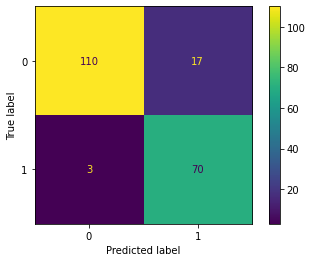

Accuracy Score : 90.00%
Precision Score : 80.46%
Recall Score : 95.89%
F1 Score : 87.50%
AUC :91.252292%
GINI :0.8250458418725055%


In [56]:
Ann_metric=ANN(X_train,y_train,X_test,y_test,24)

In [48]:
from chefboost import Chefboost as cb

In [49]:
df_train=pd.concat([X_train,y_train],axis=1)

df_test=pd.concat([X_test,y_test],axis=1)



[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  5.811861276626587  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.005
MSE:  0.0025
RMSE:  0.05
RAE:  0.08058229640253803
RRSE:  0.10275479134285173
Mean:  0.385
MAE / Mean:  1.2987012987012987 %
RMSE / Mean:  12.987012987012987 %
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       127
           1       0.96      0.92      0.94        73

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



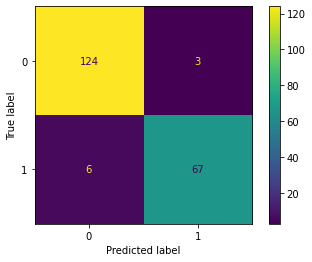

Accuracy Score : 95.50%
Precision Score : 95.71%
Recall Score : 91.78%
F1 Score : 93.71%
AUC :94.709309%
GINI :0.8941861719339881%


In [50]:

Chaid_metric=CHAID(df_train,X_test,y_test)

In [68]:
Metrics=pd.DataFrame({'KNN':Knn_metric,
                       'RF':RF_metric,
                       'LR':Log_metric,
                      'LSVM_L1':LSVM_L1_metric,
                      'LSVM_L2':LSVM_L2_metric,
                      'C50':C50_metric,
                      'CHAID':Chaid_metric,
                      'ANN':Ann_metric
                     })

Metrics.head(6)

,KNN,RF,LR,LSVM_L1,LSVM_L2,C50,CHAID,ANN
Accuracy Score,0.58,0.97,0.94,0.94,0.86,0.94,0.96,0.90
Precision Score,0.44,0.97,0.92,0.91,0.87,0.92,0.96,0.80
Recall Score,0.55,0.95,0.93,0.95,0.74,0.92,0.92,0.96
F1 Score,0.49,0.96,0.93,0.93,0.80,0.92,0.94,0.88
AUC,0.57,0.96,0.94,0.95,0.84,0.94,0.95,0.91
GINI,0.15,0.93,0.88,0.89,0.68,0.87,0.89,0.83


<AxesSubplot:title={'center':'Comparison of precision, recall and accuracy for all classifiers without feature selections'}, xlabel='classifiers', ylabel='Performance'>

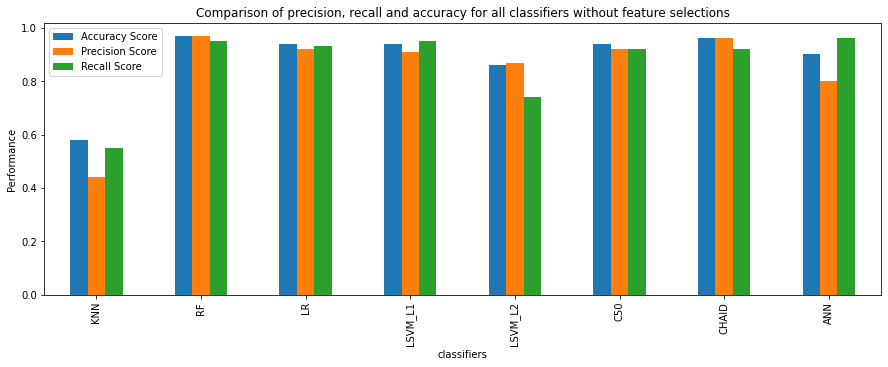

In [69]:
Metrics.transpose().plot.bar(xlabel='classifiers',ylabel='Performance',
                             y=['Accuracy Score','Precision Score','Recall Score'],
                             figsize=(15,5),
                             title='Comparison of precision, recall and accuracy for all classifiers without feature selections')

<AxesSubplot:title={'center':'Comparison of F1 score for all classifiers without feature selections'}, xlabel='classifiers', ylabel='Performance of F1 score'>

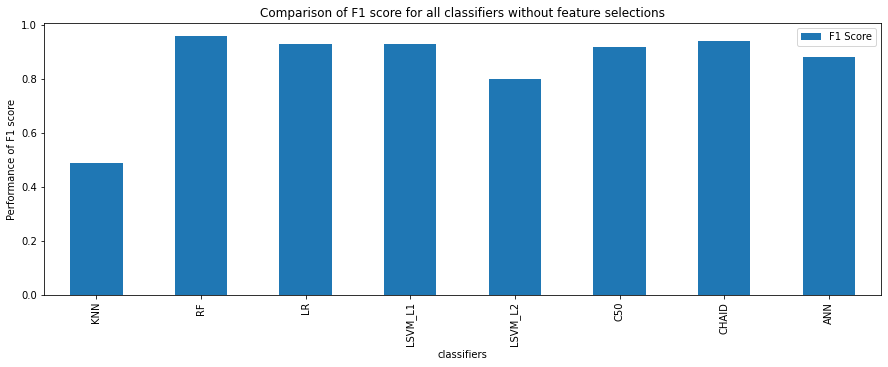

In [70]:
Metrics.transpose().plot.bar(xlabel='classifiers',ylabel='Performance of F1 score',
                             y=['F1 Score'],
                             figsize=(15,5),
                             title='Comparison of F1 score for all classifiers without feature selections')

Text(0, 0.5, 'AUC')

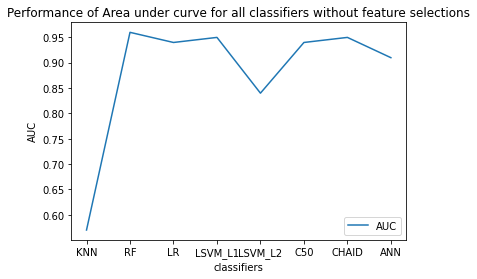

In [71]:
sns.lineplot(data=Metrics.transpose()['AUC'],label='AUC')
plt.title('Performance of Area under curve for all classifiers without feature selections')
plt.xlabel('classifiers')
plt.ylabel('AUC')

Text(0, 0.5, 'GINI Index')

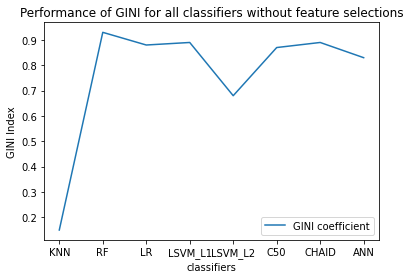

In [72]:
sns.lineplot(data=Metrics.transpose()['GINI'],label='GINI coefficient')
plt.title('Performance of GINI for all classifiers without feature selections')
plt.xlabel('classifiers')
plt.ylabel('GINI Index')

# Forward Feature selection

In [185]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50,random_state=0)


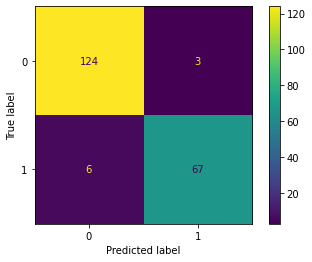

Accuracy Score : 95.50%
Precision Score : 95.71%
Recall Score : 91.78%
F1 Score : 93.71%
AUC :94.709309%
GINI :0.8941861719339881%


In [186]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


# Sequential Forward Selection(sfs)
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SFS(knn,
          k_features=6,
          forward=True,
          floating=False,
          scoring ="accuracy",
          cv = 0)
sfs.fit(X_train,y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
knn.fit(X_train_sfs,y_train)
Y_pred_knn = knn.predict(X_test_sfs)

cm=confusion_matrix(y_test,Y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

Knn_sfs_metric=Evaluate(y_test,Y_pred_knn)

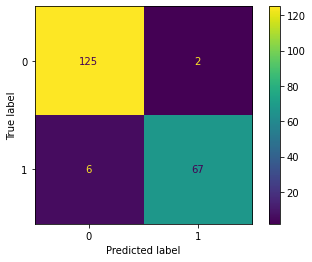

Accuracy Score : 96.00%
Precision Score : 97.10%
Recall Score : 91.78%
F1 Score : 94.37%
AUC :95.103009%
GINI :0.9020601876820193%


In [187]:
rd_clf = RandomForestClassifier()

sfs = SFS(rd_clf,
          k_features=6,
          forward=True,
          floating=False,
          scoring ="accuracy",
          cv = 0)
sfs.fit(X_train,y_train)

X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

rd_clf.fit(X_train_sfs,y_train)
Y_pred_rf =rd_clf.predict(X_test_sfs)

cm=confusion_matrix(y_test,Y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rd_clf.classes_)
disp.plot()
plt.show()

RF_sfs_metric=Evaluate(y_test,Y_pred_rf)

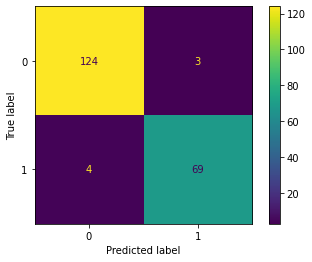

Accuracy Score : 96.50%
Precision Score : 95.83%
Recall Score : 94.52%
F1 Score : 95.17%
AUC :96.079172%
GINI :0.9215834322079604%


In [188]:
logi = LogisticRegression(max_iter=10000)
sfs = SFS(logi,
          k_features=6,
          forward=True,
          floating=False,
          scoring ="accuracy",
          cv = 0)
sfs=sfs.fit(X_train,y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
logi.fit(X_train_sfs,y_train)

Y_pred_lr=logi.predict(X_test_sfs)

cm=confusion_matrix(y_test,Y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logi.classes_)
disp.plot()
plt.show()

Log_sfs_metric=Evaluate(y_test,Y_pred_lr)


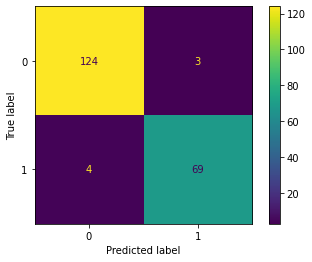

Accuracy Score : 96.50%
Precision Score : 95.83%
Recall Score : 94.52%
F1 Score : 95.17%
AUC :96.079172%
GINI :0.9215834322079604%


In [189]:
clf1=LinearSVC(penalty='l1',loss="squared_hinge", max_iter=10000,C=2,dual=False, tol=1e-2)
sfs = SFS(clf1,
          k_features=6,
          forward=True,
          floating=False,
          scoring ="accuracy",
          cv = 0)

sfs=sfs.fit(X_train,y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
clf1.fit(X_train_sfs,y_train)

#clf1.fit(X_train,y_train)

Y_pred_l1=clf1.predict(X_test_sfs)

cm=confusion_matrix(y_test,Y_pred_l1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf1.classes_)
disp.plot()
plt.show()

LSVM1_sfs_metric=Evaluate(y_test,Y_pred_l1)


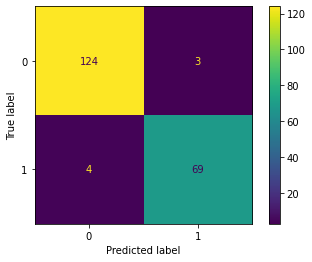

Accuracy Score : 96.50%
Precision Score : 95.83%
Recall Score : 94.52%
F1 Score : 95.17%
AUC :96.079172%
GINI :0.9215834322079604%


In [190]:
clf=LinearSVC(penalty='l2',max_iter=10000,loss="squared_hinge", dual=False, tol=1e-3,C=1)
#clf = SVC(kernel='linear',penalty='l2',C=1)
sfs = SFS(clf,
          k_features=6,
          forward=True,
          floating=False,
          scoring ="accuracy",
          cv = 0)
sfs=sfs.fit(X_train,y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
clf.fit(X_train_sfs,y_train)

Y_pred_l2=clf.predict(X_test_sfs)

cm=confusion_matrix(y_test,Y_pred_l2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

LSVM2_sfs_metric=Evaluate(y_test,Y_pred_l2)


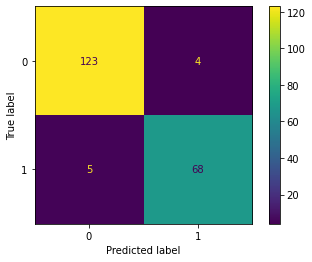

Accuracy Score : 95.50%
Precision Score : 94.44%
Recall Score : 93.15%
F1 Score : 93.79%
AUC :95.000539%
GINI :0.9000107863229425%


In [191]:
dt=DecisionTreeClassifier(criterion='entropy')
# accuracy score, confusion matrix and classification report of DecisionTreeClassifier
sfs = SFS(dt,
          k_features=6,
          forward=True,
          floating=False,
          scoring ="accuracy",
          cv = 0)

sfs=sfs.fit(X_train,y_train)

X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
dt.fit(X_train_sfs,y_train)

Y_pred_dt=dt.predict(X_test_sfs)


cm=confusion_matrix(y_test,Y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()
plt.show()

C50_sfs_metric=Evaluate(y_test,Y_pred_dt)


In [201]:
features=['age', 'bp', 'sg', 'al', 'su', 'hemo']
X_cfs=df[features]
Y_cfs=df['classification']

X_train, X_test, y_train, y_test = train_test_split(X_cfs,Y_cfs, test_size = 0.5, random_state = 0)
X_train.shape, X_test.shape

((200, 6), (200, 6))

In [202]:
model_S = Sequential()

# Adding the input layer and the first hidden layer
model_S.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
model_S.add(Dropout(rate = 0.1))

# Adding the second hidden layer
model_S.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model_S.add(Dropout(rate = 0.1))

# Adding the third hidden layer
model_S.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model_S.add(Dropout(rate = 0.1))


# Adding the output layer
model_S.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model_S.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_S.summary()



# opt = keras.optimizers.Adam(learning_rate=0.01)
model_S.fit(X_train, y_train, epochs=100)



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                224       
                                                                 
 dropout_36 (Dropout)        (None, 32)                0         
                                                                 
 dense_49 (Dense)            (None, 16)                528       
                                                                 
 dropout_37 (Dropout)        (None, 16)                0         
                                                                 
 dense_50 (Dense)            (None, 8)                 136       
                                                                 
 dropout_38 (Dropout)        (None, 8)                 0         
                                                                 
 dense_51 (Dense)            (None, 1)               

7/7 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8950
Epoch 72/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.9150
Epoch 73/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.9150
Epoch 74/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.9200
Epoch 75/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8950
Epoch 76/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3213 - accuracy: 0.9000
Epoch 77/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.9050
Epoch 78/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.9200
Epoch 79/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.9250
Epoch 80/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.9250
Epoch 81/100
7/7 [===============

In [203]:
yp = model_S.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

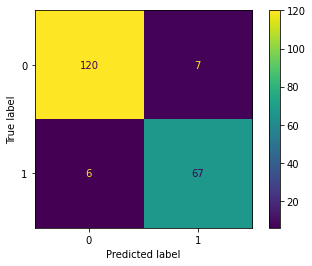

Accuracy Score : 93.50%
Precision Score : 90.54%
Recall Score : 91.78%
F1 Score : 91.16%
AUC :93.134505%
GINI :0.8626901089418617%


In [204]:
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Ann_sfs_metric=Evaluate(y_test,y_pred)


In [198]:
type(X_train)

numpy.ndarray

In [205]:
df_train=pd.concat([X_train,y_train],axis=1)

df_test=pd.concat([X_test,y_test],axis=1)

config = {"algorithm": "CHAID"}
tree = cb.fit(df_train,config,target_label='classification')
y_pred=[]
c=0

for i in y_test:
    x1=cb.predict(tree,X_test.iloc[c])
    if x1 > 0.6:
        y_pred.append(1)
    else:
        y_pred.append(0)
    c=c+1

[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  2.6160049438476562  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.0125
MSE:  0.00875
RMSE:  0.09354143466934854
RAE:  0.15075567228888181
RRSE:  0.1922366120271981
Mean:  0.385
MAE / Mean:  3.2467532467532467 %
RMSE / Mean:  24.296476537493128 %


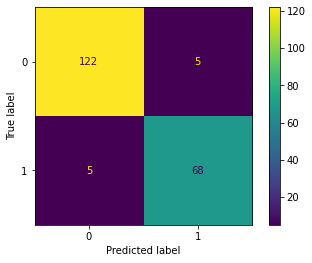

Accuracy Score : 95.00%
Precision Score : 93.15%
Recall Score : 93.15%
F1 Score : 93.15%
AUC :94.606839%
GINI :0.8921367705749108%


In [206]:
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

chaid_sfs_metric=Evaluate(y_test,y_pred)


In [207]:
Metrics_sfs=pd.DataFrame({'KNN':Knn_sfs_metric,
                       'RF':RF_sfs_metric,
                       'LR':Log_sfs_metric,
                      'LSVM_L1':LSVM1_sfs_metric,
                      'LSVM_L2':LSVM2_sfs_metric,
                      'C50':C50_sfs_metric,
                      'CHAID':chaid_sfs_metric,
                      'ANN':Ann_sfs_metric
                     })

Metrics_sfs.head(6)



,KNN,RF,LR,LSVM_L1,LSVM_L2,C50,CHAID,ANN
Accuracy Score,0.96,0.96,0.96,0.96,0.96,0.96,0.95,0.94
Precision Score,0.96,0.97,0.96,0.96,0.96,0.94,0.93,0.91
Recall Score,0.92,0.92,0.95,0.95,0.95,0.93,0.93,0.92
F1 Score,0.94,0.94,0.95,0.95,0.95,0.94,0.93,0.91
AUC,0.95,0.95,0.96,0.96,0.96,0.95,0.95,0.93
GINI,0.89,0.90,0.92,0.92,0.92,0.90,0.89,0.86


<AxesSubplot:title={'center':'Comparison of precision, recall and accuracy for all classifiers based forward feature selections'}, xlabel='classifiers', ylabel='Performance'>

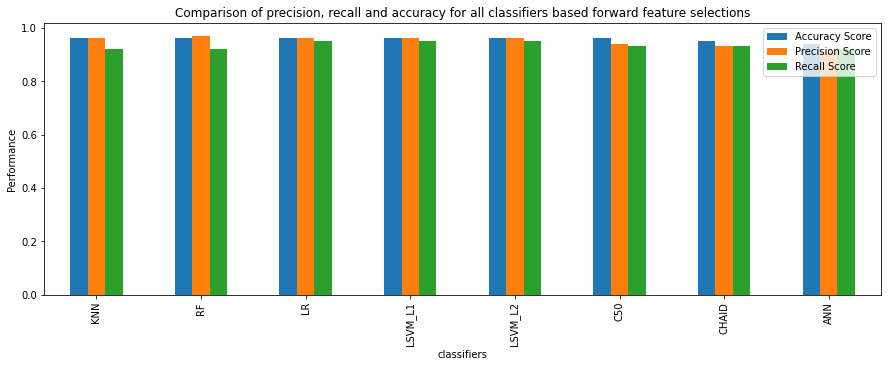

In [208]:
Metrics_sfs.transpose().plot.bar(xlabel='classifiers',ylabel='Performance',
                             y=['Accuracy Score','Precision Score','Recall Score'],
                             figsize=(15,5),
                             title='Comparison of precision, recall and accuracy for all classifiers based forward feature selections')

<AxesSubplot:title={'center':'Comparison of F1 score for all classifiers with forward feature selection'}, xlabel='classifiers', ylabel='Performance of F1 score'>

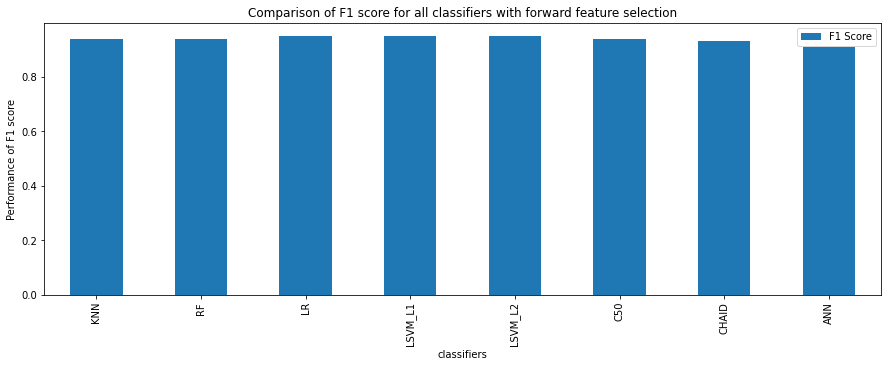

In [209]:

Metrics_sfs.transpose().plot.bar(xlabel='classifiers',ylabel='Performance of F1 score',
                             y=['F1 Score'],
                             figsize=(15,5),
                             title='Comparison of F1 score for all classifiers with forward feature selection')


Text(0, 0.5, 'performance')

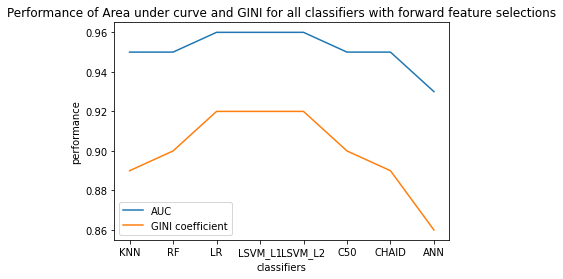

In [210]:
sns.lineplot(data=Metrics_sfs.transpose()['AUC'],label='AUC')
sns.lineplot(data=Metrics_sfs.transpose()['GINI'],label='GINI coefficient')
plt.title('Performance of Area under curve and GINI for all classifiers with forward feature selections')
plt.xlabel('classifiers')
plt.ylabel('performance')

# Correlation Based Feature Selection

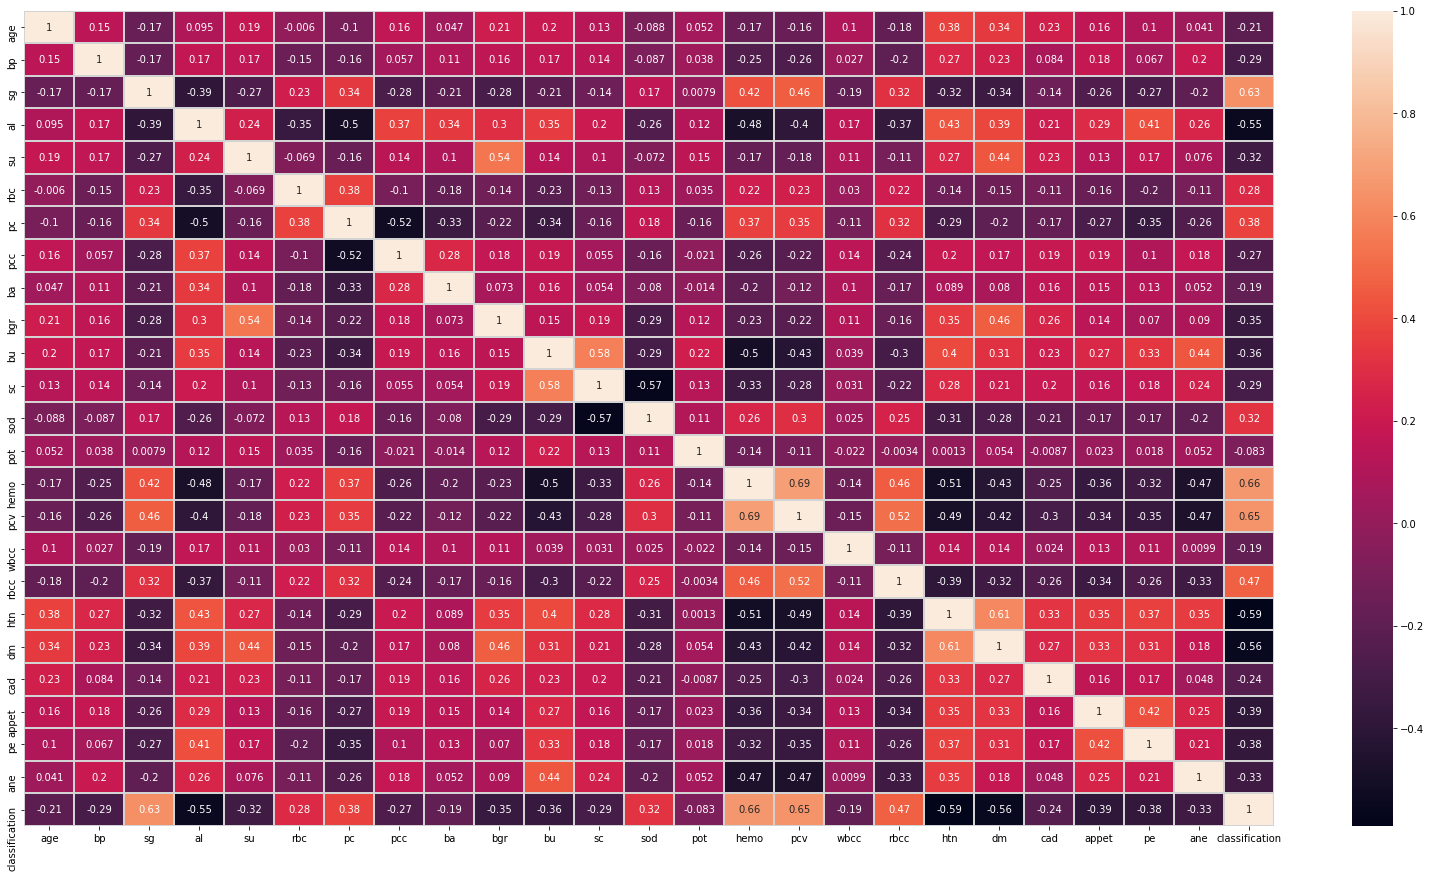

In [96]:
plt.figure(figsize=(28,15))
sns.heatmap(df.corr(),annot=True,linewidths=2,linecolor='lightgrey')
plt.show()

In [97]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [98]:
corr_features = correlation(X, 0.521)
corr_features

{'bgr', 'dm', 'pcv', 'sc', 'sod'}

In [146]:
X=df[corr_features]
y=df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
X_train.shape, X_test.shape

<ipython-input-146-6521b22086cb>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X=df[corr_features]


((200, 5), (200, 5))

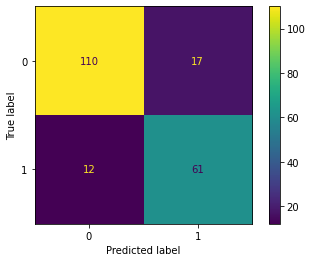

Accuracy Score : 85.50%
Precision Score : 78.21%
Recall Score : 83.56%
F1 Score : 80.79%
AUC :85.087909%
GINI :0.701758170639629%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       127
           1       0.95      0.96      0.95        73

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200



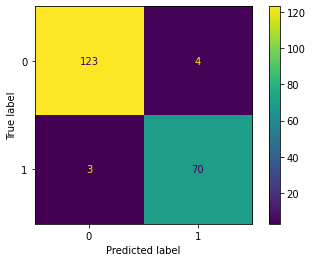

Accuracy Score : 96.50%
Precision Score : 94.59%
Recall Score : 95.89%
F1 Score : 95.24%
AUC :96.370402%
GINI :0.9274080465969152%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       127
           1       0.92      0.89      0.90        73

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200



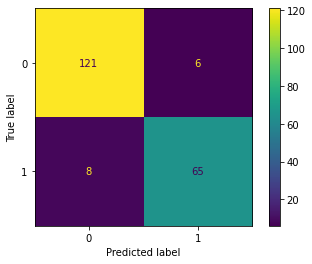

Accuracy Score : 93.00%
Precision Score : 91.55%
Recall Score : 89.04%
F1 Score : 90.28%
AUC :92.158343%
GINI :0.8431668644159207%


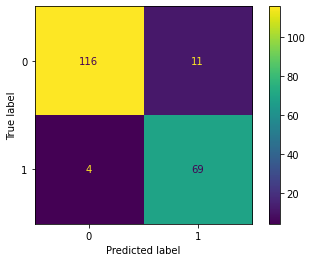

Accuracy Score : 92.50%
Precision Score : 86.25%
Recall Score : 94.52%
F1 Score : 90.20%
AUC :92.929565%
GINI :0.8585913062237085%


C:\Users\SIVASAI\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       127
           1       0.86      0.97      0.91        73

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.94      0.93      0.93       200



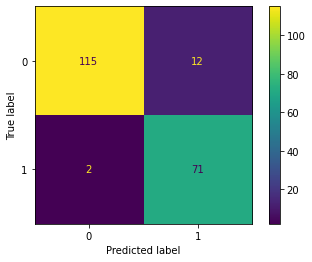

Accuracy Score : 93.00%
Precision Score : 85.54%
Recall Score : 97.26%
F1 Score : 91.03%
AUC :93.905728%
GINI :0.8781145507496491%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       127
           1       0.93      0.85      0.89        73

    accuracy                           0.92       200
   macro avg       0.92      0.90      0.91       200
weighted avg       0.92      0.92      0.92       200



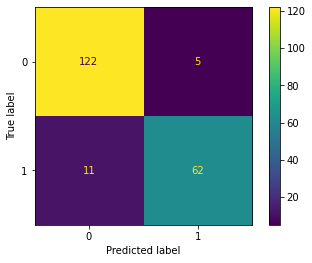

Accuracy Score : 92.00%
Precision Score : 92.54%
Recall Score : 84.93%
F1 Score : 88.57%
AUC :90.497249%
GINI :0.8099449897529931%
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                192       
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dropout_14 (Dropout)        (None, 8)                 

Epoch 55/250
10/10 - 0s - loss: 0.3457 - accuracy: 0.8800 - val_loss: 0.3559 - val_accuracy: 0.9200 - 234ms/epoch - 23ms/step
Epoch 56/250
10/10 - 0s - loss: 0.3409 - accuracy: 0.8900 - val_loss: 0.3578 - val_accuracy: 0.8900 - 202ms/epoch - 20ms/step
Epoch 57/250
10/10 - 0s - loss: 0.3165 - accuracy: 0.8900 - val_loss: 0.3544 - val_accuracy: 0.9100 - 325ms/epoch - 33ms/step
Epoch 58/250
10/10 - 0s - loss: 0.3136 - accuracy: 0.9100 - val_loss: 0.3484 - val_accuracy: 0.9300 - 382ms/epoch - 38ms/step
Epoch 59/250
10/10 - 0s - loss: 0.3212 - accuracy: 0.8900 - val_loss: 0.3470 - val_accuracy: 0.9200 - 364ms/epoch - 36ms/step
Epoch 60/250
10/10 - 0s - loss: 0.3253 - accuracy: 0.9000 - val_loss: 0.3500 - val_accuracy: 0.9000 - 388ms/epoch - 39ms/step
Epoch 61/250
10/10 - 0s - loss: 0.3075 - accuracy: 0.8700 - val_loss: 0.3458 - val_accuracy: 0.9300 - 235ms/epoch - 24ms/step
Epoch 62/250
10/10 - 0s - loss: 0.3007 - accuracy: 0.9200 - val_loss: 0.3485 - val_accuracy: 0.9100 - 317ms/epoch - 32

Epoch 120/250
10/10 - 0s - loss: 0.2422 - accuracy: 0.9300 - val_loss: 0.3189 - val_accuracy: 0.9200 - 318ms/epoch - 32ms/step
Epoch 121/250
10/10 - 0s - loss: 0.2344 - accuracy: 0.9300 - val_loss: 0.3226 - val_accuracy: 0.9200 - 320ms/epoch - 32ms/step
Epoch 122/250
10/10 - 0s - loss: 0.2594 - accuracy: 0.9100 - val_loss: 0.3258 - val_accuracy: 0.9200 - 299ms/epoch - 30ms/step
Epoch 123/250
10/10 - 0s - loss: 0.2325 - accuracy: 0.9400 - val_loss: 0.3167 - val_accuracy: 0.9100 - 221ms/epoch - 22ms/step
Epoch 124/250
10/10 - 0s - loss: 0.2326 - accuracy: 0.9300 - val_loss: 0.3167 - val_accuracy: 0.9300 - 248ms/epoch - 25ms/step
Epoch 125/250
10/10 - 0s - loss: 0.2476 - accuracy: 0.9100 - val_loss: 0.3178 - val_accuracy: 0.9100 - 266ms/epoch - 27ms/step
Epoch 126/250
10/10 - 0s - loss: 0.2337 - accuracy: 0.9300 - val_loss: 0.3232 - val_accuracy: 0.9100 - 277ms/epoch - 28ms/step
Epoch 127/250
10/10 - 0s - loss: 0.2222 - accuracy: 0.9400 - val_loss: 0.3216 - val_accuracy: 0.9300 - 343ms/ep

Epoch 185/250
10/10 - 0s - loss: 0.2510 - accuracy: 0.9300 - val_loss: 0.3552 - val_accuracy: 0.9200 - 242ms/epoch - 24ms/step
Epoch 186/250
10/10 - 0s - loss: 0.2335 - accuracy: 0.9000 - val_loss: 0.3060 - val_accuracy: 0.9000 - 218ms/epoch - 22ms/step
Epoch 187/250
10/10 - 0s - loss: 0.2149 - accuracy: 0.9300 - val_loss: 0.3066 - val_accuracy: 0.9200 - 175ms/epoch - 17ms/step
Epoch 188/250
10/10 - 0s - loss: 0.1962 - accuracy: 0.9400 - val_loss: 0.3025 - val_accuracy: 0.9300 - 188ms/epoch - 19ms/step
Epoch 189/250
10/10 - 0s - loss: 0.2304 - accuracy: 0.9100 - val_loss: 0.2976 - val_accuracy: 0.9300 - 178ms/epoch - 18ms/step
Epoch 190/250
10/10 - 0s - loss: 0.2158 - accuracy: 0.9300 - val_loss: 0.2968 - val_accuracy: 0.9200 - 155ms/epoch - 15ms/step
Epoch 191/250
10/10 - 0s - loss: 0.2056 - accuracy: 0.9300 - val_loss: 0.3059 - val_accuracy: 0.9200 - 160ms/epoch - 16ms/step
Epoch 192/250
10/10 - 0s - loss: 0.2120 - accuracy: 0.9300 - val_loss: 0.3003 - val_accuracy: 0.9200 - 156ms/ep

Epoch 250/250
10/10 - 0s - loss: 0.1972 - accuracy: 0.9300 - val_loss: 0.3130 - val_accuracy: 0.9200 - 171ms/epoch - 17ms/step


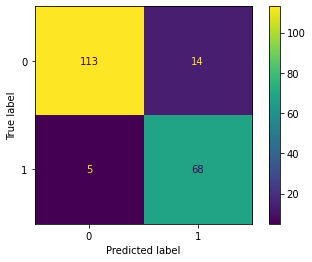

Accuracy Score : 90.50%
Precision Score : 82.93%
Recall Score : 93.15%
F1 Score : 87.74%
AUC :91.063531%
GINI :0.8212706288426275%


In [100]:
Knn_cfs_metric=KNN(X_train,y_train,X_test,y_test)
Rf_cfs_metric=RF(X_train,y_train,X_test,y_test)
Lr_cfs_metric=LR(X_train,y_train,X_test,y_test)
LSVM1_cfs_metric=LSVM_L1(X_train,y_train,X_test,y_test)
LSVM2_cfs_metric=LSVM_L2(X_train,y_train,X_test,y_test)
C50_cfs_metric=C50(X_train,y_train,X_test,y_test)
Ann_cfs_metric=ANN(X_train,y_train,X_test,y_test,len(corr_features))


In [101]:
df_train=pd.concat([X_train,y_train],axis=1)

df_test=pd.concat([X_test,y_test],axis=1)

df_train

,sod,dm,sc,pcv,bgr,classification
138,142.0,0,1.6,44.0,95.0,0
236,136.0,1,2.0,25.0,74.0,0
219,141.0,1,2.5,28.0,238.0,0
274,141.0,0,0.7,44.0,107.0,1
278,142.0,0,1.2,44.0,112.0,1
...,...,...,...,...,...,...
323,143.0,0,1.1,45.0,130.0,1
192,147.0,0,0.9,41.0,130.0,0
117,139.0,0,1.3,37.0,219.0,0
47,145.0,0,0.8,45.0,131.0,0


[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  6.290900945663452  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.0375
MSE:  0.03125
RMSE:  0.1767766952966369
RAE:  0.2849014411490949
RRSE:  0.36329304878969604
Mean:  0.385
MAE / Mean:  9.74025974025974 %
RMSE / Mean:  45.91602475237322 %
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       127
           1       0.94      0.99      0.96        73

    accuracy                           0.97       200
   macro avg       0.96      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



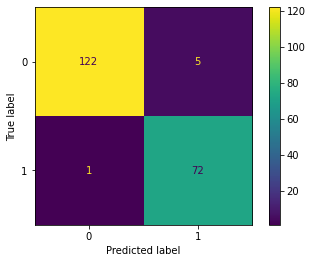

Accuracy Score : 97.00%
Precision Score : 93.51%
Recall Score : 98.63%
F1 Score : 96.00%
AUC :97.346565%
GINI :0.946931291122856%


In [102]:
Chaid_cfs_metric=CHAID(df_train,X_test,y_test)

In [103]:
Metrics_cfs=pd.DataFrame({
                     'KNN':Knn_cfs_metric,
                       'RF':Rf_cfs_metric,
                       'LR':Lr_cfs_metric,
                      'LSVM_L1':LSVM1_cfs_metric,
                      'LSVM_L2':LSVM2_cfs_metric,
                      'C50':C50_cfs_metric,
                      'CHAID':Chaid_cfs_metric,
                      'ANN':Ann_cfs_metric
    
})

Metrics_cfs.head()

,KNN,RF,LR,LSVM_L1,LSVM_L2,C50,CHAID,ANN
Accuracy Score,0.86,0.96,0.93,0.92,0.93,0.92,0.97,0.90
Precision Score,0.78,0.95,0.92,0.86,0.86,0.93,0.94,0.83
Recall Score,0.84,0.96,0.89,0.95,0.97,0.85,0.99,0.93
F1 Score,0.81,0.95,0.90,0.90,0.91,0.89,0.96,0.88
AUC,0.85,0.96,0.92,0.93,0.94,0.90,0.97,0.91


<AxesSubplot:title={'center':'Comparison of F1 score for all classifiers with correaltion based feature selection'}, xlabel='classifiers', ylabel='Performance of F1 score'>

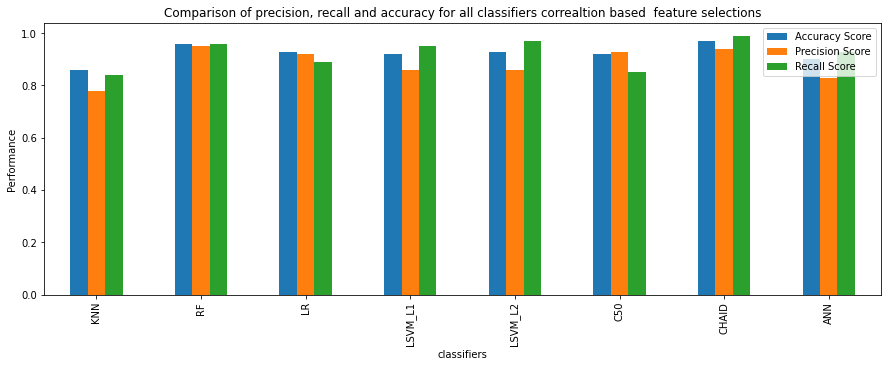

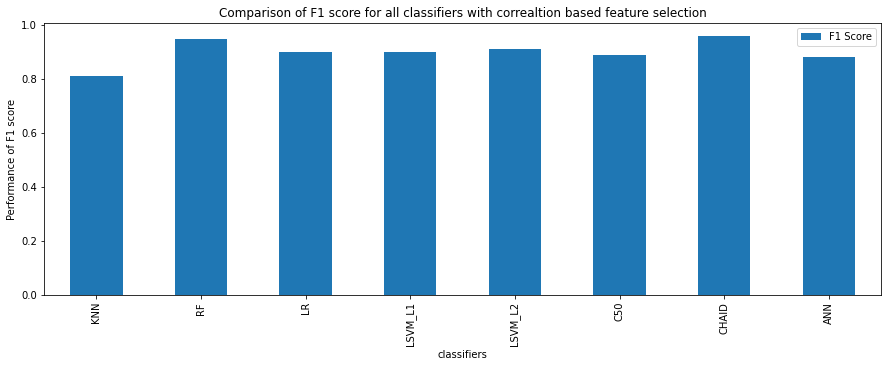

In [104]:
Metrics_cfs.transpose().plot.bar(xlabel='classifiers',ylabel='Performance',
                             y=['Accuracy Score','Precision Score','Recall Score'],
                             figsize=(15,5),
                             title='Comparison of precision, recall and accuracy for all classifiers correaltion based  feature selections')
Metrics_cfs.transpose().plot.bar(xlabel='classifiers',ylabel='Performance of F1 score',
                             y=['F1 Score'],
                             figsize=(15,5),
                             title='Comparison of F1 score for all classifiers with correaltion based feature selection')



Text(0, 0.5, 'Performance')

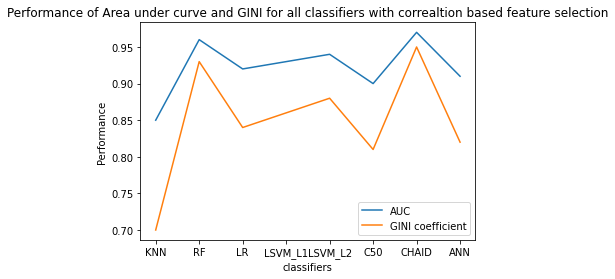

In [105]:
sns.lineplot(data=Metrics_cfs.transpose()['AUC'],label='AUC')
sns.lineplot(data=Metrics_cfs.transpose()['GINI'],label='GINI coefficient')
plt.title('Performance of Area under curve and GINI for all classifiers with correaltion based feature selection')
plt.xlabel('classifiers')
plt.ylabel('Performance')

# Smote with full features

C:\Users\SIVASAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classification', ylabel='count'>

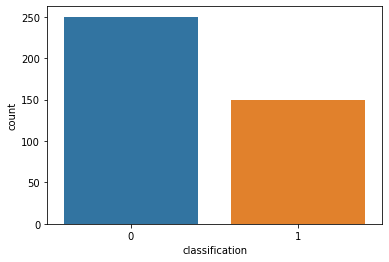

In [183]:
sns.countplot(df['classification'])

In [147]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res,y_train_res = sm.fit_resample(X_train, np.array(y_train).ravel())

In [128]:
y_train_res

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [129]:
len(y_train_res[y_train_res==0]),len(y_train_res[y_train_res==1])

(123, 123)

In [132]:
X_train=X_train_res
y_train=(y_train_res)
type(y_train)

numpy.ndarray

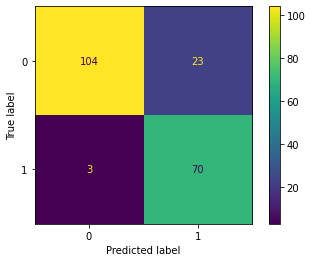

Accuracy Score : 87.00%
Precision Score : 75.27%
Recall Score : 95.89%
F1 Score : 84.34%
AUC :88.890087%
GINI :0.7778017473843166%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       127
           1       0.96      0.90      0.93        73

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.95      0.95      0.95       200



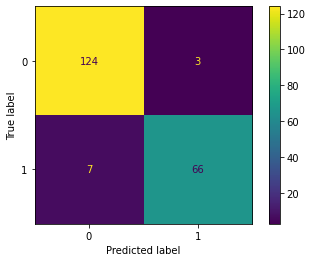

Accuracy Score : 95.00%
Precision Score : 95.65%
Recall Score : 90.41%
F1 Score : 92.96%
AUC :94.024377%
GINI :0.8804875417970015%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       127
           1       0.86      0.93      0.89        73

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



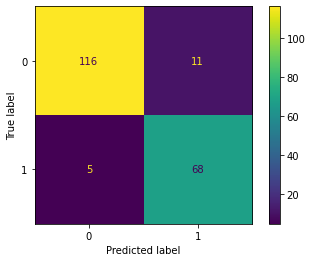

Accuracy Score : 92.00%
Precision Score : 86.08%
Recall Score : 93.15%
F1 Score : 89.47%
AUC :92.244634%
GINI :0.8448926760867221%


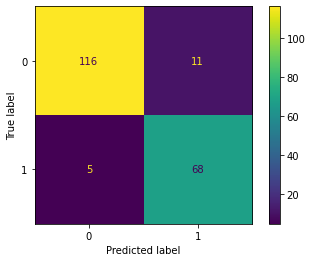

Accuracy Score : 92.00%
Precision Score : 86.08%
Recall Score : 93.15%
F1 Score : 89.47%
AUC :92.244634%
GINI :0.8448926760867221%


C:\Users\SIVASAI\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       127
           1       0.86      0.93      0.89        73

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



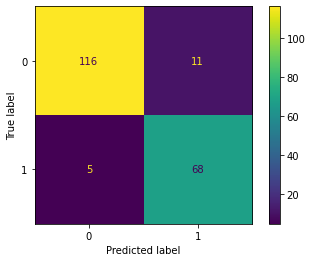

Accuracy Score : 92.00%
Precision Score : 86.08%
Recall Score : 93.15%
F1 Score : 89.47%
AUC :92.244634%
GINI :0.8448926760867221%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       127
           1       0.92      0.90      0.91        73

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.94      0.93       200



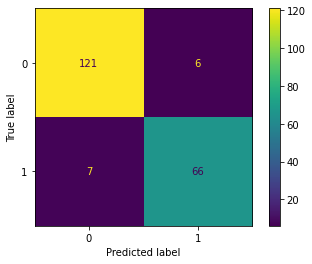

Accuracy Score : 93.50%
Precision Score : 91.67%
Recall Score : 90.41%
F1 Score : 91.03%
AUC :92.843275%
GINI :0.8568654945529068%
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                224       
                                                                 
 dropout_21 (Dropout)        (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 16)                528       
                                                                 
 dropout_22 (Dropout)        (None, 16)                0         
                                                                 
 dense_30 (Dense)            (None, 8)                 136       
                                                                 
 dropout_23 (Dropout)        (None, 8)                 

Epoch 55/250
13/13 - 0s - loss: 0.2735 - accuracy: 0.8537 - val_loss: 0.2700 - val_accuracy: 0.9350 - 218ms/epoch - 17ms/step
Epoch 56/250
13/13 - 0s - loss: 0.3271 - accuracy: 0.8537 - val_loss: 0.2664 - val_accuracy: 0.9350 - 206ms/epoch - 16ms/step
Epoch 57/250
13/13 - 0s - loss: 0.3063 - accuracy: 0.8618 - val_loss: 0.2743 - val_accuracy: 0.9350 - 207ms/epoch - 16ms/step
Epoch 58/250
13/13 - 0s - loss: 0.2894 - accuracy: 0.8943 - val_loss: 0.2566 - val_accuracy: 0.9350 - 205ms/epoch - 16ms/step
Epoch 59/250
13/13 - 0s - loss: 0.2624 - accuracy: 0.9106 - val_loss: 0.2631 - val_accuracy: 0.9431 - 199ms/epoch - 15ms/step
Epoch 60/250
13/13 - 0s - loss: 0.2715 - accuracy: 0.9024 - val_loss: 0.2657 - val_accuracy: 0.9431 - 178ms/epoch - 14ms/step
Epoch 61/250
13/13 - 0s - loss: 0.2812 - accuracy: 0.8943 - val_loss: 0.2549 - val_accuracy: 0.9350 - 179ms/epoch - 14ms/step
Epoch 62/250
13/13 - 0s - loss: 0.2525 - accuracy: 0.8780 - val_loss: 0.2530 - val_accuracy: 0.9350 - 168ms/epoch - 13

Epoch 120/250
13/13 - 0s - loss: 0.2240 - accuracy: 0.9106 - val_loss: 0.2023 - val_accuracy: 0.9187 - 229ms/epoch - 18ms/step
Epoch 121/250
13/13 - 0s - loss: 0.2402 - accuracy: 0.8943 - val_loss: 0.2024 - val_accuracy: 0.9350 - 181ms/epoch - 14ms/step
Epoch 122/250
13/13 - 0s - loss: 0.2789 - accuracy: 0.8862 - val_loss: 0.2091 - val_accuracy: 0.9512 - 199ms/epoch - 15ms/step
Epoch 123/250
13/13 - 0s - loss: 0.2227 - accuracy: 0.9106 - val_loss: 0.2222 - val_accuracy: 0.9431 - 169ms/epoch - 13ms/step
Epoch 124/250
13/13 - 0s - loss: 0.2320 - accuracy: 0.9187 - val_loss: 0.2259 - val_accuracy: 0.9431 - 168ms/epoch - 13ms/step
Epoch 125/250
13/13 - 0s - loss: 0.2234 - accuracy: 0.9024 - val_loss: 0.1986 - val_accuracy: 0.9431 - 176ms/epoch - 14ms/step
Epoch 126/250
13/13 - 0s - loss: 0.2381 - accuracy: 0.9024 - val_loss: 0.2501 - val_accuracy: 0.9431 - 161ms/epoch - 12ms/step
Epoch 127/250
13/13 - 0s - loss: 0.2143 - accuracy: 0.9106 - val_loss: 0.1930 - val_accuracy: 0.9431 - 178ms/ep

Epoch 185/250
13/13 - 0s - loss: 0.2499 - accuracy: 0.8862 - val_loss: 0.1932 - val_accuracy: 0.9350 - 470ms/epoch - 36ms/step
Epoch 186/250
13/13 - 0s - loss: 0.2388 - accuracy: 0.8943 - val_loss: 0.1999 - val_accuracy: 0.9512 - 323ms/epoch - 25ms/step
Epoch 187/250
13/13 - 0s - loss: 0.2232 - accuracy: 0.9187 - val_loss: 0.1955 - val_accuracy: 0.9431 - 355ms/epoch - 27ms/step
Epoch 188/250
13/13 - 0s - loss: 0.2047 - accuracy: 0.9106 - val_loss: 0.1965 - val_accuracy: 0.9431 - 374ms/epoch - 29ms/step
Epoch 189/250
13/13 - 0s - loss: 0.2261 - accuracy: 0.8943 - val_loss: 0.1887 - val_accuracy: 0.9350 - 321ms/epoch - 25ms/step
Epoch 190/250
13/13 - 0s - loss: 0.2412 - accuracy: 0.8943 - val_loss: 0.1990 - val_accuracy: 0.9512 - 315ms/epoch - 24ms/step
Epoch 191/250
13/13 - 0s - loss: 0.2396 - accuracy: 0.8862 - val_loss: 0.1983 - val_accuracy: 0.9512 - 324ms/epoch - 25ms/step
Epoch 192/250
13/13 - 0s - loss: 0.2204 - accuracy: 0.9024 - val_loss: 0.2072 - val_accuracy: 0.9431 - 364ms/ep

Epoch 250/250
13/13 - 0s - loss: 0.2006 - accuracy: 0.9431 - val_loss: 0.2136 - val_accuracy: 0.9431 - 208ms/epoch - 16ms/step


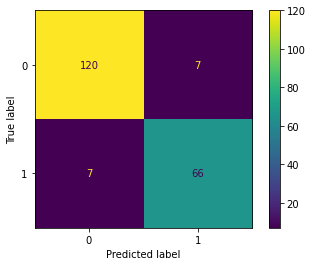

Accuracy Score : 93.00%
Precision Score : 90.41%
Recall Score : 90.41%
F1 Score : 90.41%
AUC :92.449574%
GINI :0.8489914788048756%


In [133]:
Knn_smote_metric=KNN(X_train,y_train,X_test,y_test)
Rf_smote_metric=RF(X_train,y_train,X_test,y_test)
Lr_smote_metric=LR(X_train,y_train,X_test,y_test)
LSVM1_smote_metric=LSVM_L1(X_train,y_train,X_test,y_test)
LSVM2_smote_metric=LSVM_L2(X_train,y_train,X_test,y_test)
C50_smote_metric=C50(X_train,y_train,X_test,y_test)
Ann_smote_metric=ANN(X_train,y_train,X_test,y_test,6)


[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  5.818504095077515  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.01016260162601626
MSE:  0.007113821138211382
RMSE:  0.08434347122457897
RAE:  0.11927968090342447
RRSE:  0.16868694244915794
Mean:  0.5
MAE / Mean:  2.0325203252032518 %
RMSE / Mean:  16.868694244915794 %
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       127
           1       0.94      0.93      0.94        73

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



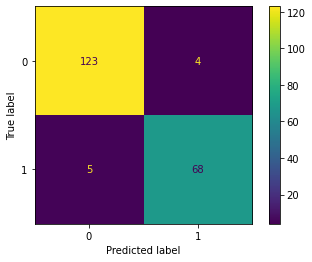

Accuracy Score : 95.50%
Precision Score : 94.44%
Recall Score : 93.15%
F1 Score : 93.79%
AUC :95.000539%
GINI :0.9000107863229425%


In [135]:
y_train=pd.DataFrame(y_train_res)
df_train=pd.concat([X_train,y_train],axis=1)

df_test=pd.concat([X_test,y_test],axis=1)

df_train.rename(columns={0:'classification'},inplace=True)
chaid_smote_metric=CHAID(df_train,X_test,y_test)


In [136]:
Metrics_smote=pd.DataFrame({
                     'KNN':Knn_smote_metric,
                       'RF':Rf_smote_metric,
                       'LR':Lr_smote_metric,
                      'LSVM_L1':LSVM1_smote_metric,
                      'LSVM_L2':LSVM2_smote_metric,
                      'C50':C50_smote_metric,
                      'CHAID':chaid_smote_metric,
                      'ANN':Ann_smote_metric
    
})

Metrics_smote.head()

,KNN,RF,LR,LSVM_L1,LSVM_L2,C50,CHAID,ANN
Accuracy Score,0.87,0.95,0.92,0.92,0.92,0.94,0.96,0.93
Precision Score,0.75,0.96,0.86,0.86,0.86,0.92,0.94,0.90
Recall Score,0.96,0.90,0.93,0.93,0.93,0.90,0.93,0.90
F1 Score,0.84,0.93,0.89,0.89,0.89,0.91,0.94,0.90
AUC,0.89,0.94,0.92,0.92,0.92,0.93,0.95,0.92


<AxesSubplot:title={'center':'Comparison of F1 score for all classifiers using smote with all features'}, xlabel='classifiers', ylabel='Performance of F1 score'>

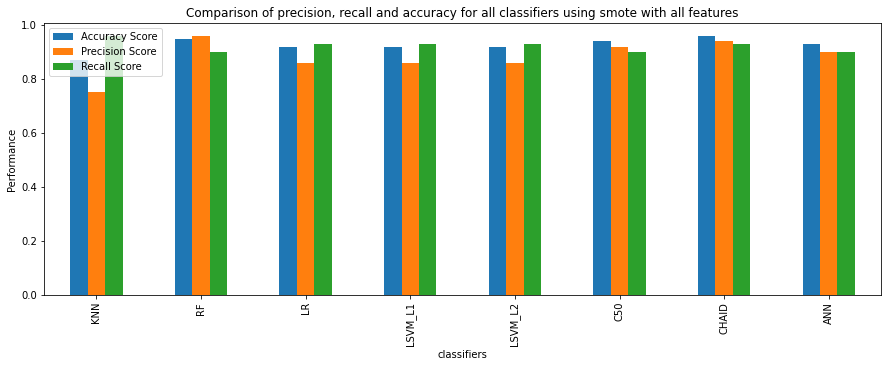

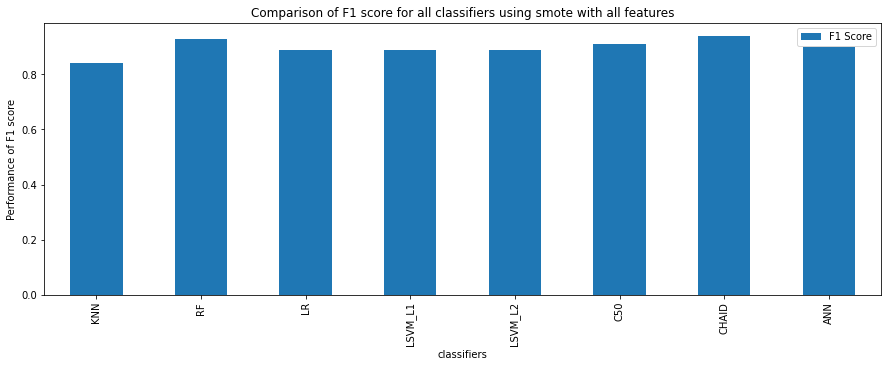

In [137]:
Metrics_smote.transpose().plot.bar(xlabel='classifiers',ylabel='Performance',
                             y=['Accuracy Score','Precision Score','Recall Score'],
                             figsize=(15,5),
                             title='Comparison of precision, recall and accuracy for all classifiers using smote with all features')
Metrics_smote.transpose().plot.bar(xlabel='classifiers',ylabel='Performance of F1 score',
                             y=['F1 Score'],
                             figsize=(15,5),
                             title='Comparison of F1 score for all classifiers using smote with all features')



Text(0, 0.5, 'Performance')

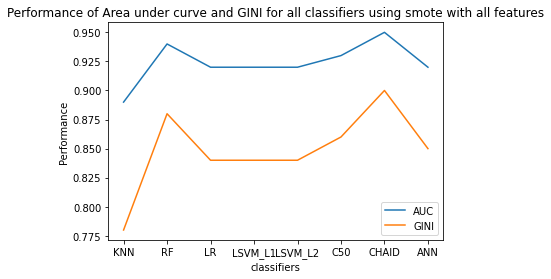

In [138]:
sns.lineplot(data=Metrics_smote.transpose()['AUC'],label='AUC')
sns.lineplot(data=Metrics_smote.transpose()['GINI'],label='GINI')
plt.title('Performance of Area under curve and GINI for all classifiers using smote with all features')
plt.xlabel('classifiers')
plt.ylabel('Performance')

# LASSO  Feature Selection

In [221]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [222]:
X=df.drop(['classification'], axis = 1)
y=df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,shuffle=True,random_state = 42)

In [223]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])


In [224]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,20,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [225]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 199 candidates, totalling 995 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.119 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.075 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.085 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.122 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.097 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.161 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.135 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.145 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.183 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.148 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.229 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004

[CV 4/5] END .................model__alpha=2.2;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=2.2;, score=-0.235 total time=   0.0s
[CV 1/5] END ..model__alpha=2.3000000000000003;, score=-0.240 total time=   0.0s
[CV 2/5] END ..model__alpha=2.3000000000000003;, score=-0.226 total time=   0.0s
[CV 3/5] END ..model__alpha=2.3000000000000003;, score=-0.230 total time=   0.0s
[CV 4/5] END ..model__alpha=2.3000000000000003;, score=-0.269 total time=   0.0s
[CV 5/5] END ..model__alpha=2.3000000000000003;, score=-0.235 total time=   0.0s
[CV 1/5] END ..model__alpha=2.4000000000000004;, score=-0.240 total time=   0.0s
[CV 2/5] END ..model__alpha=2.4000000000000004;, score=-0.226 total time=   0.0s
[CV 3/5] END ..model__alpha=2.4000000000000004;, score=-0.230 total time=   0.0s
[CV 4/5] END ..model__alpha=2.4000000000000004;, score=-0.269 total time=   0.0s
[CV 5/5] END ..model__alpha=2.4000000000000004;, score=-0.235 total time=   0.0s
[CV 1/5] END ..model__alpha=

[CV 5/5] END .................model__alpha=4.6;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=4.7;, score=-0.240 total time=   0.0s
[CV 2/5] END .................model__alpha=4.7;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=4.7;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=4.7;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=4.7;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=4.8;, score=-0.240 total time=   0.0s
[CV 2/5] END .................model__alpha=4.8;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=4.8;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=4.8;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=4.8;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=4.9;, score=-0.240 total time=   0.0s
[CV 2/5] END ...............

[CV 2/5] END .................model__alpha=7.1;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=7.1;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=7.1;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=7.1;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=7.2;, score=-0.240 total time=   0.0s
[CV 2/5] END .................model__alpha=7.2;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=7.2;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=7.2;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=7.2;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=7.3;, score=-0.240 total time=   0.0s
[CV 2/5] END .................model__alpha=7.3;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=7.3;, score=-0.230 total time=   0.0s
[CV 4/5] END ...............

[CV 1/5] END .................model__alpha=9.2;, score=-0.240 total time=   0.0s
[CV 2/5] END .................model__alpha=9.2;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=9.2;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=9.2;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=9.2;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=9.3;, score=-0.240 total time=   0.0s
[CV 2/5] END .................model__alpha=9.3;, score=-0.226 total time=   0.0s
[CV 3/5] END .................model__alpha=9.3;, score=-0.230 total time=   0.0s
[CV 4/5] END .................model__alpha=9.3;, score=-0.269 total time=   0.0s
[CV 5/5] END .................model__alpha=9.3;, score=-0.235 total time=   0.0s
[CV 1/5] END .................model__alpha=9.4;, score=-0.240 total time=   0.0s
[CV 2/5] END .................model__alpha=9.4;, score=-0.226 total time=   0.0s
[CV 3/5] END ...............

[CV 1/5] END ................model__alpha=11.5;, score=-0.240 total time=   0.0s
[CV 2/5] END ................model__alpha=11.5;, score=-0.226 total time=   0.0s
[CV 3/5] END ................model__alpha=11.5;, score=-0.230 total time=   0.0s
[CV 4/5] END ................model__alpha=11.5;, score=-0.269 total time=   0.0s
[CV 5/5] END ................model__alpha=11.5;, score=-0.235 total time=   0.0s
[CV 1/5] END ................model__alpha=11.6;, score=-0.240 total time=   0.0s
[CV 2/5] END ................model__alpha=11.6;, score=-0.226 total time=   0.0s
[CV 3/5] END ................model__alpha=11.6;, score=-0.230 total time=   0.0s
[CV 4/5] END ................model__alpha=11.6;, score=-0.269 total time=   0.0s
[CV 5/5] END ................model__alpha=11.6;, score=-0.235 total time=   0.0s
[CV 1/5] END ..model__alpha=11.700000000000001;, score=-0.240 total time=   0.0s
[CV 2/5] END ..model__alpha=11.700000000000001;, score=-0.226 total time=   0.0s
[CV 3/5] END ..model__alpha=

[CV 5/5] END ................model__alpha=13.9;, score=-0.235 total time=   0.0s
[CV 1/5] END ................model__alpha=14.0;, score=-0.240 total time=   0.0s
[CV 2/5] END ................model__alpha=14.0;, score=-0.226 total time=   0.0s
[CV 3/5] END ................model__alpha=14.0;, score=-0.230 total time=   0.0s
[CV 4/5] END ................model__alpha=14.0;, score=-0.269 total time=   0.0s
[CV 5/5] END ................model__alpha=14.0;, score=-0.235 total time=   0.0s
[CV 1/5] END ................model__alpha=14.1;, score=-0.240 total time=   0.0s
[CV 2/5] END ................model__alpha=14.1;, score=-0.226 total time=   0.0s
[CV 3/5] END ................model__alpha=14.1;, score=-0.230 total time=   0.0s
[CV 4/5] END ................model__alpha=14.1;, score=-0.269 total time=   0.0s
[CV 5/5] END ................model__alpha=14.1;, score=-0.235 total time=   0.0s
[CV 1/5] END ..model__alpha=14.200000000000001;, score=-0.240 total time=   0.0s
[CV 2/5] END ..model__alpha=

[CV 2/5] END ................model__alpha=16.1;, score=-0.226 total time=   0.0s
[CV 3/5] END ................model__alpha=16.1;, score=-0.230 total time=   0.0s
[CV 4/5] END ................model__alpha=16.1;, score=-0.269 total time=   0.0s
[CV 5/5] END ................model__alpha=16.1;, score=-0.235 total time=   0.0s
[CV 1/5] END ..model__alpha=16.200000000000003;, score=-0.240 total time=   0.0s
[CV 2/5] END ..model__alpha=16.200000000000003;, score=-0.226 total time=   0.0s
[CV 3/5] END ..model__alpha=16.200000000000003;, score=-0.230 total time=   0.0s
[CV 4/5] END ..model__alpha=16.200000000000003;, score=-0.269 total time=   0.0s
[CV 5/5] END ..model__alpha=16.200000000000003;, score=-0.235 total time=   0.0s
[CV 1/5] END ................model__alpha=16.3;, score=-0.240 total time=   0.0s
[CV 2/5] END ................model__alpha=16.3;, score=-0.226 total time=   0.0s
[CV 3/5] END ................model__alpha=16.3;, score=-0.230 total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END ..model__alpha=18.500000000000004;, score=-0.226 total time=   0.0s
[CV 3/5] END ..model__alpha=18.500000000000004;, score=-0.230 total time=   0.0s
[CV 4/5] END ..model__alpha=18.500000000000004;, score=-0.269 total time=   0.0s
[CV 5/5] END ..model__alpha=18.500000000000004;, score=-0.235 total time=   0.0s
[CV 1/5] END ................model__alpha=18.6;, score=-0.240 total time=   0.0s
[CV 2/5] END ................model__alpha=18.6;, score=-0.226 total time=   0.0s
[CV 3/5] END ................model__alpha=18.6;, score=-0.230 total time=   0.0s
[CV 4/5] END ................model__alpha=18.6;, score=-0.269 total time=   0.0s
[CV 5/5] END ................model__alpha=18.6;, score=-0.235 total time=   0.0s
[CV 1/5] END ..model__alpha=18.700000000000003;, score=-0.240 total time=   0.0s
[CV 2/5] END ..model__alpha=18.700000000000003;, score=-0.226 total time=   0.0s
[CV 3/5] END ..model__alpha=18.700000000000003;, score=-0.230 total time=   0.0s
[CV 4/5] END ..model__alpha=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5...
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4,
       15.5, 15.6, 15.7, 15.8, 15.9, 16. , 16.1, 16.2, 16.3, 16.4, 16.5,
       16.6, 16.7, 16.8, 16.9, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6,
       17.7, 17.8, 17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7,
       18.8, 18.9, 19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8,
       19.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [226]:
search.best_params_

{'model__alpha': 0.1}

In [227]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [228]:
importance = np.abs(coefficients)
importance

array([0.        , 0.        , 0.11242439, 0.04834584, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03903743,
       0.06278326, 0.        , 0.        , 0.04783359, 0.0461181 ,
       0.        , 0.        , 0.        , 0.        ])

In [229]:
features=[]
for i in X.columns:
    features.append(i)
print(features)

['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [230]:
fea=np.array(features)[importance > 0]
fea

array(['sg', 'al', 'hemo', 'pcv', 'htn', 'dm'], dtype='<U5')

In [231]:
X=df[fea]

y=df['classification']

In [232]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
X_train.shape, X_test.shape


((200, 6), (200, 6))

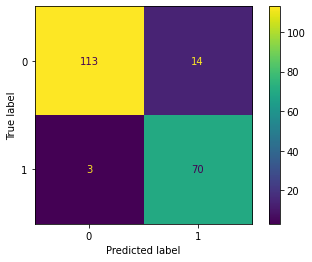

Accuracy Score : 91.50%
Precision Score : 83.33%
Recall Score : 95.89%
F1 Score : 89.17%
AUC :92.433394%
GINI :0.8486678891166%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       127
           1       0.97      0.92      0.94        73

    accuracy                           0.96       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200



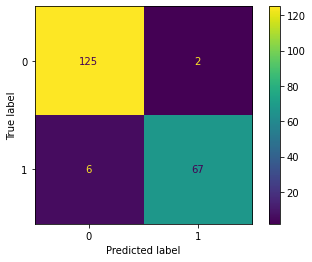

Accuracy Score : 96.00%
Precision Score : 97.10%
Recall Score : 91.78%
F1 Score : 94.37%
AUC :95.103009%
GINI :0.9020601876820193%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       127
           1       0.92      0.95      0.93        73

    accuracy                           0.95       200
   macro avg       0.94      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



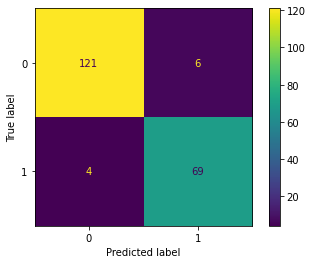

Accuracy Score : 95.00%
Precision Score : 92.00%
Recall Score : 94.52%
F1 Score : 93.24%
AUC :94.898069%
GINI :0.8979613849638657%


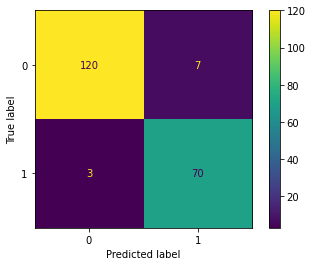

Accuracy Score : 95.00%
Precision Score : 90.91%
Recall Score : 95.89%
F1 Score : 93.33%
AUC :95.189300%
GINI :0.9037859993528203%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       127
           1       0.85      0.96      0.90        73

    accuracy                           0.93       200
   macro avg       0.91      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



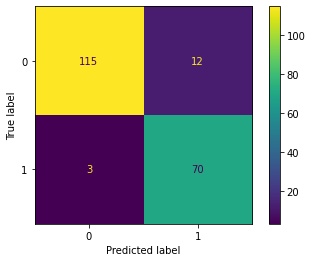

Accuracy Score : 92.50%
Precision Score : 85.37%
Recall Score : 95.89%
F1 Score : 90.32%
AUC :93.220796%
GINI :0.8644159206126629%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       127
           1       0.96      0.93      0.94        73

    accuracy                           0.96       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200



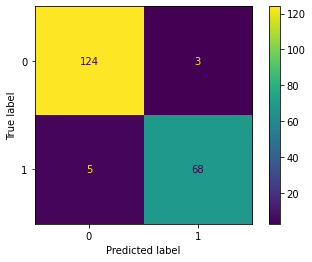

Accuracy Score : 96.00%
Precision Score : 95.77%
Recall Score : 93.15%
F1 Score : 94.44%
AUC :95.394240%
GINI :0.907884802070974%
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 32)                224       
                                                                 
 dropout_39 (Dropout)        (None, 32)                0         
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dropout_40 (Dropout)        (None, 16)                0         
                                                                 
 dense_54 (Dense)            (None, 8)                 136       
                                                                 
 dropout_41 (Dropout)        (None, 8)                 

Epoch 56/250
10/10 - 0s - loss: 0.1555 - accuracy: 0.9500 - val_loss: 0.1754 - val_accuracy: 0.9300 - 40ms/epoch - 4ms/step
Epoch 57/250
10/10 - 0s - loss: 0.1282 - accuracy: 0.9700 - val_loss: 0.1753 - val_accuracy: 0.9400 - 45ms/epoch - 4ms/step
Epoch 58/250
10/10 - 0s - loss: 0.1323 - accuracy: 0.9500 - val_loss: 0.1768 - val_accuracy: 0.9400 - 36ms/epoch - 4ms/step
Epoch 59/250
10/10 - 0s - loss: 0.1213 - accuracy: 0.9600 - val_loss: 0.1695 - val_accuracy: 0.9300 - 37ms/epoch - 4ms/step
Epoch 60/250
10/10 - 0s - loss: 0.1412 - accuracy: 0.9500 - val_loss: 0.1993 - val_accuracy: 0.9200 - 37ms/epoch - 4ms/step
Epoch 61/250
10/10 - 0s - loss: 0.1405 - accuracy: 0.9500 - val_loss: 0.1739 - val_accuracy: 0.9300 - 37ms/epoch - 4ms/step
Epoch 62/250
10/10 - 0s - loss: 0.1304 - accuracy: 0.9500 - val_loss: 0.1736 - val_accuracy: 0.9400 - 37ms/epoch - 4ms/step
Epoch 63/250
10/10 - 0s - loss: 0.1057 - accuracy: 0.9600 - val_loss: 0.1780 - val_accuracy: 0.9300 - 37ms/epoch - 4ms/step
Epoch 64

Epoch 122/250
10/10 - 0s - loss: 0.1369 - accuracy: 0.9600 - val_loss: 0.1587 - val_accuracy: 0.9600 - 46ms/epoch - 5ms/step
Epoch 123/250
10/10 - 0s - loss: 0.0906 - accuracy: 0.9800 - val_loss: 0.1625 - val_accuracy: 0.9300 - 40ms/epoch - 4ms/step
Epoch 124/250
10/10 - 0s - loss: 0.1226 - accuracy: 0.9600 - val_loss: 0.1567 - val_accuracy: 0.9300 - 47ms/epoch - 5ms/step
Epoch 125/250
10/10 - 0s - loss: 0.1174 - accuracy: 0.9600 - val_loss: 0.1560 - val_accuracy: 0.9500 - 45ms/epoch - 4ms/step
Epoch 126/250
10/10 - 0s - loss: 0.1031 - accuracy: 0.9800 - val_loss: 0.1596 - val_accuracy: 0.9300 - 52ms/epoch - 5ms/step
Epoch 127/250
10/10 - 0s - loss: 0.1048 - accuracy: 0.9600 - val_loss: 0.1596 - val_accuracy: 0.9300 - 40ms/epoch - 4ms/step
Epoch 128/250
10/10 - 0s - loss: 0.0913 - accuracy: 0.9700 - val_loss: 0.1545 - val_accuracy: 0.9500 - 36ms/epoch - 4ms/step
Epoch 129/250
10/10 - 0s - loss: 0.0897 - accuracy: 0.9600 - val_loss: 0.1586 - val_accuracy: 0.9300 - 38ms/epoch - 4ms/step


Epoch 188/250
10/10 - 0s - loss: 0.0874 - accuracy: 0.9800 - val_loss: 0.1764 - val_accuracy: 0.9300 - 40ms/epoch - 4ms/step
Epoch 189/250
10/10 - 0s - loss: 0.0952 - accuracy: 0.9700 - val_loss: 0.1438 - val_accuracy: 0.9600 - 39ms/epoch - 4ms/step
Epoch 190/250
10/10 - 0s - loss: 0.1041 - accuracy: 0.9800 - val_loss: 0.1567 - val_accuracy: 0.9400 - 40ms/epoch - 4ms/step
Epoch 191/250
10/10 - 0s - loss: 0.1435 - accuracy: 0.9400 - val_loss: 0.1427 - val_accuracy: 0.9600 - 40ms/epoch - 4ms/step
Epoch 192/250
10/10 - 0s - loss: 0.0896 - accuracy: 0.9700 - val_loss: 0.1526 - val_accuracy: 0.9400 - 39ms/epoch - 4ms/step
Epoch 193/250
10/10 - 0s - loss: 0.1009 - accuracy: 0.9700 - val_loss: 0.1452 - val_accuracy: 0.9600 - 38ms/epoch - 4ms/step
Epoch 194/250
10/10 - 0s - loss: 0.0899 - accuracy: 0.9500 - val_loss: 0.1446 - val_accuracy: 0.9600 - 40ms/epoch - 4ms/step
Epoch 195/250
10/10 - 0s - loss: 0.1021 - accuracy: 0.9700 - val_loss: 0.1860 - val_accuracy: 0.9200 - 38ms/epoch - 4ms/step


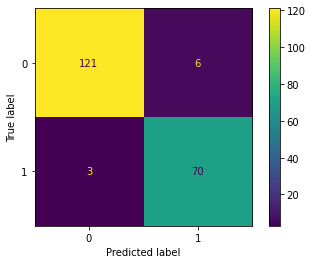

Accuracy Score : 95.50%
Precision Score : 92.11%
Recall Score : 95.89%
F1 Score : 93.96%
AUC :95.583001%
GINI :0.911660015100852%


In [233]:
Knn_lasso_metric=KNN(X_train,y_train,X_test,y_test)
Rf_lasso_metric=RF(X_train,y_train,X_test,y_test)
Lr_lasso_metric=LR(X_train,y_train,X_test,y_test)
LSVM1_lasso_metric=LSVM_L1(X_train,y_train,X_test,y_test)
LSVM2_lasso_metric=LSVM_L2(X_train,y_train,X_test,y_test)
C50_lasso_metric=C50(X_train,y_train,X_test,y_test)
Ann_lasso_metric=ANN(X_train,y_train,X_test,y_test,len(fea))


In [234]:
df_train=pd.concat([X_train,y_train],axis=1)

df_test=pd.concat([X_test,y_test],axis=1)

df_train

,sg,al,hemo,pcv,htn,dm,classification
138,1.010,1.0,7.6,44.0,0,0,0
236,1.020,2.0,9.1,25.0,1,1,0
219,1.010,0.0,9.8,28.0,1,1,0
274,1.020,0.0,14.4,44.0,0,0,1
278,1.020,0.0,14.5,44.0,0,0,1
...,...,...,...,...,...,...,...
323,1.025,0.0,15.9,45.0,0,0,1
192,1.015,0.0,11.1,41.0,0,0,0
117,1.020,0.0,12.5,37.0,0,0,0
47,1.010,3.0,15.0,45.0,0,0,0


[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  4.040192127227783  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.005
MSE:  0.0025
RMSE:  0.05
RAE:  0.08058229640253803
RRSE:  0.10275479134285173
Mean:  0.385
MAE / Mean:  1.2987012987012987 %
RMSE / Mean:  12.987012987012987 %
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       127
           1       0.96      0.92      0.94        73

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



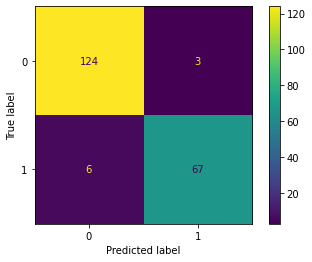

Accuracy Score : 95.50%
Precision Score : 95.71%
Recall Score : 91.78%
F1 Score : 93.71%
AUC :94.709309%
GINI :0.8941861719339881%


In [235]:
Chaid_lasso_metric=CHAID(df_train,X_test,y_test)

In [236]:
Metrics_lasso=pd.DataFrame({
                     'KNN':Knn_lasso_metric,
                       'RF':Rf_lasso_metric,
                       'LR':Lr_lasso_metric,
                      'LSVM_L1':LSVM1_lasso_metric,
                      'LSVM_L2':LSVM2_lasso_metric,
                      'C50':C50_lasso_metric,
                      'CHAID':Chaid_lasso_metric,
                      'ANN':Ann_lasso_metric
    
})

Metrics_lasso.head()

,KNN,RF,LR,LSVM_L1,LSVM_L2,C50,CHAID,ANN
Accuracy Score,0.92,0.96,0.95,0.95,0.92,0.96,0.96,0.96
Precision Score,0.83,0.97,0.92,0.91,0.85,0.96,0.96,0.92
Recall Score,0.96,0.92,0.95,0.96,0.96,0.93,0.92,0.96
F1 Score,0.89,0.94,0.93,0.93,0.90,0.94,0.94,0.94
AUC,0.92,0.95,0.95,0.95,0.93,0.95,0.95,0.96


<AxesSubplot:title={'center':'Comparison of F1 score for all classifiers using lasso feturfe selection'}, xlabel='classifiers', ylabel='Performance of F1 score'>

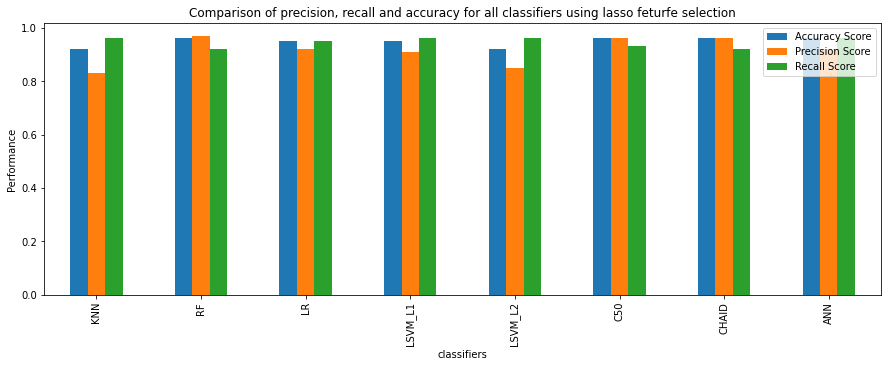

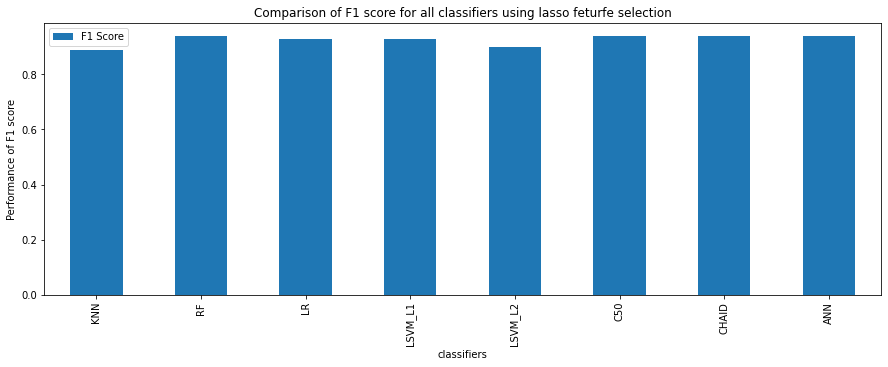

In [237]:
Metrics_lasso.transpose().plot.bar(xlabel='classifiers',ylabel='Performance',
                             y=['Accuracy Score','Precision Score','Recall Score'],
                             figsize=(15,5),
                             title='Comparison of precision, recall and accuracy for all classifiers using lasso feturfe selection')
Metrics_lasso.transpose().plot.bar(xlabel='classifiers',ylabel='Performance of F1 score',
                             y=['F1 Score'],
                             figsize=(15,5),
                             title='Comparison of F1 score for all classifiers using lasso feturfe selection')



Text(0, 0.5, 'Performance')

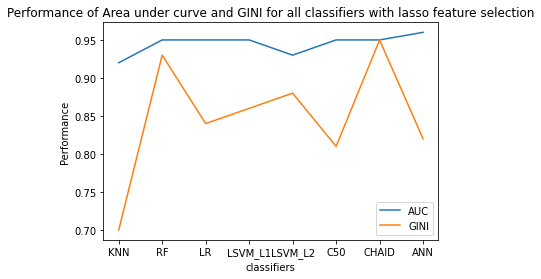

In [238]:
sns.lineplot(data=Metrics_lasso.transpose()['AUC'],label='AUC')
sns.lineplot(data=Metrics_cfs.transpose()['GINI'],label='GINI')
plt.title('Performance of Area under curve and GINI for all classifiers with lasso feature selection')
plt.xlabel('classifiers')
plt.ylabel('Performance')

# SMOTE with Selected Features

In [239]:
print(X)
print(y)

        sg   al  hemo   pcv  htn  dm
0    1.020  1.0  15.4  44.0    1   1
1    1.020  4.0  11.3  38.0    0   0
2    1.010  2.0   9.6  31.0    0   1
3    1.005  4.0  11.2  32.0    1   0
4    1.010  2.0  11.6  35.0    0   0
..     ...  ...   ...   ...  ...  ..
395  1.020  0.0  15.7  47.0    0   0
396  1.025  0.0  16.5  54.0    0   0
397  1.020  0.0  15.8  49.0    0   0
398  1.025  0.0  14.2  51.0    0   0
399  1.025  0.0  15.8  53.0    0   0

[400 rows x 6 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int32


In [240]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res,y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [241]:
len(y_train_res)

246

In [242]:

len(y_train_res[y_train_res==0]),len(y_train_res[y_train_res==1])

(123, 123)

In [243]:
X_train=X_train_res
y_train=(y_train_res)

type(y_train)

numpy.ndarray

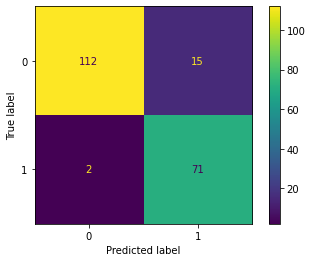

Accuracy Score : 91.50%
Precision Score : 82.56%
Recall Score : 97.26%
F1 Score : 89.31%
AUC :92.724625%
GINI :0.8544925035055548%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       127
           1       0.97      0.92      0.94        73

    accuracy                           0.96       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200



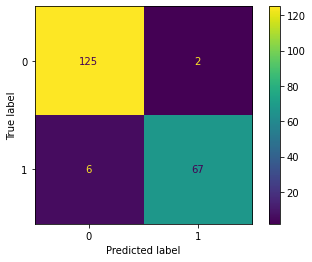

Accuracy Score : 96.00%
Precision Score : 97.10%
Recall Score : 91.78%
F1 Score : 94.37%
AUC :95.103009%
GINI :0.9020601876820193%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       127
           1       0.91      0.95      0.93        73

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



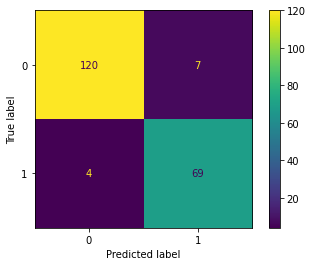

Accuracy Score : 94.50%
Precision Score : 90.79%
Recall Score : 94.52%
F1 Score : 92.62%
AUC :94.504368%
GINI :0.8900873692158344%


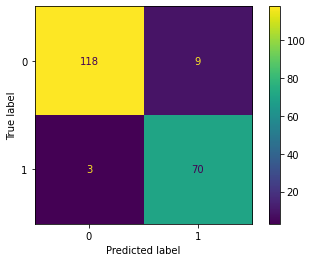

Accuracy Score : 94.00%
Precision Score : 88.61%
Recall Score : 95.89%
F1 Score : 92.11%
AUC :94.401898%
GINI :0.8880379678567576%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       127
           1       0.84      0.96      0.90        73

    accuracy                           0.92       200
   macro avg       0.91      0.93      0.92       200
weighted avg       0.93      0.92      0.92       200



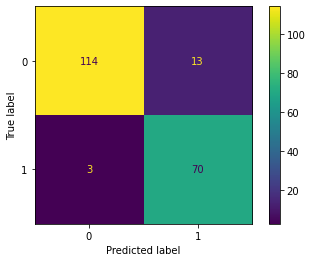

Accuracy Score : 92.00%
Precision Score : 84.34%
Recall Score : 95.89%
F1 Score : 89.74%
AUC :92.827095%
GINI :0.8565419048646314%
Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       127
           1       0.92      0.93      0.93        73

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



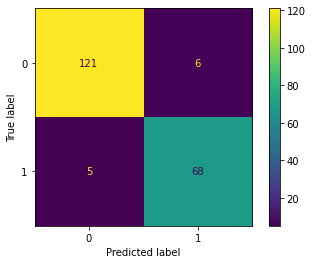

Accuracy Score : 94.50%
Precision Score : 91.89%
Recall Score : 93.15%
F1 Score : 92.52%
AUC :94.213138%
GINI :0.8842627548268793%
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 32)                224       
                                                                 
 dropout_42 (Dropout)        (None, 32)                0         
                                                                 
 dense_57 (Dense)            (None, 16)                528       
                                                                 
 dropout_43 (Dropout)        (None, 16)                0         
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dropout_44 (Dropout)        (None, 8)                

Epoch 55/250
13/13 - 0s - loss: 0.1315 - accuracy: 0.9675 - val_loss: 0.1505 - val_accuracy: 0.9512 - 87ms/epoch - 7ms/step
Epoch 56/250
13/13 - 0s - loss: 0.1559 - accuracy: 0.9593 - val_loss: 0.1659 - val_accuracy: 0.9431 - 92ms/epoch - 7ms/step
Epoch 57/250
13/13 - 0s - loss: 0.1344 - accuracy: 0.9431 - val_loss: 0.1510 - val_accuracy: 0.9431 - 87ms/epoch - 7ms/step
Epoch 58/250
13/13 - 0s - loss: 0.1258 - accuracy: 0.9431 - val_loss: 0.1491 - val_accuracy: 0.9350 - 91ms/epoch - 7ms/step
Epoch 59/250
13/13 - 0s - loss: 0.1412 - accuracy: 0.9431 - val_loss: 0.1569 - val_accuracy: 0.9431 - 91ms/epoch - 7ms/step
Epoch 60/250
13/13 - 0s - loss: 0.1252 - accuracy: 0.9512 - val_loss: 0.1492 - val_accuracy: 0.9512 - 90ms/epoch - 7ms/step
Epoch 61/250
13/13 - 0s - loss: 0.1302 - accuracy: 0.9512 - val_loss: 0.1539 - val_accuracy: 0.9431 - 89ms/epoch - 7ms/step
Epoch 62/250
13/13 - 0s - loss: 0.1134 - accuracy: 0.9675 - val_loss: 0.1476 - val_accuracy: 0.9512 - 82ms/epoch - 6ms/step
Epoch 63

Epoch 121/250
13/13 - 0s - loss: 0.0963 - accuracy: 0.9756 - val_loss: 0.1327 - val_accuracy: 0.9593 - 82ms/epoch - 6ms/step
Epoch 122/250
13/13 - 0s - loss: 0.1050 - accuracy: 0.9350 - val_loss: 0.1317 - val_accuracy: 0.9593 - 78ms/epoch - 6ms/step
Epoch 123/250
13/13 - 0s - loss: 0.1027 - accuracy: 0.9512 - val_loss: 0.1356 - val_accuracy: 0.9512 - 86ms/epoch - 7ms/step
Epoch 124/250
13/13 - 0s - loss: 0.0819 - accuracy: 0.9756 - val_loss: 0.1344 - val_accuracy: 0.9593 - 93ms/epoch - 7ms/step
Epoch 125/250
13/13 - 0s - loss: 0.0991 - accuracy: 0.9512 - val_loss: 0.1326 - val_accuracy: 0.9675 - 97ms/epoch - 7ms/step
Epoch 126/250
13/13 - 0s - loss: 0.0907 - accuracy: 0.9756 - val_loss: 0.1343 - val_accuracy: 0.9593 - 104ms/epoch - 8ms/step
Epoch 127/250
13/13 - 0s - loss: 0.0985 - accuracy: 0.9512 - val_loss: 0.1381 - val_accuracy: 0.9512 - 92ms/epoch - 7ms/step
Epoch 128/250
13/13 - 0s - loss: 0.0945 - accuracy: 0.9756 - val_loss: 0.1314 - val_accuracy: 0.9593 - 79ms/epoch - 6ms/step

Epoch 187/250
13/13 - 0s - loss: 0.0974 - accuracy: 0.9593 - val_loss: 0.1405 - val_accuracy: 0.9512 - 67ms/epoch - 5ms/step
Epoch 188/250
13/13 - 0s - loss: 0.1057 - accuracy: 0.9593 - val_loss: 0.1603 - val_accuracy: 0.9350 - 66ms/epoch - 5ms/step
Epoch 189/250
13/13 - 0s - loss: 0.0744 - accuracy: 0.9837 - val_loss: 0.1387 - val_accuracy: 0.9593 - 78ms/epoch - 6ms/step
Epoch 190/250
13/13 - 0s - loss: 0.1043 - accuracy: 0.9593 - val_loss: 0.1363 - val_accuracy: 0.9593 - 81ms/epoch - 6ms/step
Epoch 191/250
13/13 - 0s - loss: 0.0835 - accuracy: 0.9593 - val_loss: 0.1342 - val_accuracy: 0.9593 - 76ms/epoch - 6ms/step
Epoch 192/250
13/13 - 0s - loss: 0.0898 - accuracy: 0.9837 - val_loss: 0.1315 - val_accuracy: 0.9593 - 75ms/epoch - 6ms/step
Epoch 193/250
13/13 - 0s - loss: 0.0865 - accuracy: 0.9756 - val_loss: 0.1347 - val_accuracy: 0.9593 - 77ms/epoch - 6ms/step
Epoch 194/250
13/13 - 0s - loss: 0.0844 - accuracy: 0.9837 - val_loss: 0.1407 - val_accuracy: 0.9675 - 73ms/epoch - 6ms/step


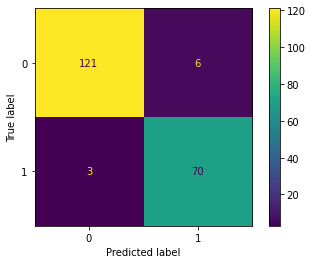

Accuracy Score : 95.50%
Precision Score : 92.11%
Recall Score : 95.89%
F1 Score : 93.96%
AUC :95.583001%
GINI :0.911660015100852%


In [244]:

Knn_smote_lasso_metric=KNN(X_train,y_train,X_test,y_test)
Rf_smote_lasso_metric=RF(X_train,y_train,X_test,y_test)
Lr_smote_lasso_metric=LR(X_train,y_train,X_test,y_test)
LSVM1_smote_lasso_metric=LSVM_L1(X_train,y_train,X_test,y_test)
LSVM2_smote_lasso_metric=LSVM_L2(X_train,y_train,X_test,y_test)
C50_smote_lasso_metric=C50(X_train,y_train,X_test,y_test)
Ann_smote_lasso_metric=ANN(X_train,y_train,X_test,y_test,6)


In [245]:

df_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
df_train['classification']=y_train
df_train

,sg,al,hemo,pcv,htn,dm,classification
0,1.010000,1.0,7.600000,44.000000,0,0,0
1,1.020000,2.0,9.100000,25.000000,1,1,0
2,1.010000,0.0,9.800000,28.000000,1,1,0
3,1.020000,0.0,14.400000,44.000000,0,0,1
4,1.020000,0.0,14.500000,44.000000,0,0,1
...,...,...,...,...,...,...,...
241,1.021444,0.0,16.546539,50.000000,0,0,1
242,1.025000,0.0,13.913945,41.482569,0,0,1
243,1.025000,0.0,16.780870,50.000000,0,0,1
244,1.022232,0.0,16.214186,46.446366,0,0,1


[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  1.8121552467346191  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.006097560975609756
MSE:  0.003048780487804878
RMSE:  0.055215763037423274
RAE:  0.07808688094430302
RRSE:  0.11043152607484655
Mean:  0.5
MAE / Mean:  1.2195121951219512 %
RMSE / Mean:  11.043152607484656 %
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       127
           1       0.95      0.95      0.95        73

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



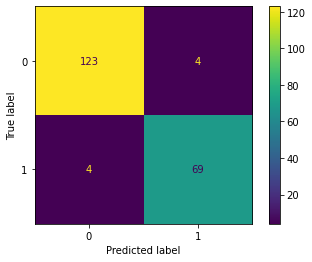

Accuracy Score : 96.00%
Precision Score : 94.52%
Recall Score : 94.52%
F1 Score : 94.52%
AUC :95.685471%
GINI :0.9137094164599289%


In [246]:

Chaid_smote_lasso_metric=CHAID(df_train,X_test,y_test)

In [247]:

Metrics_smote_lasso=pd.DataFrame({
                     'KNN':Knn_smote_lasso_metric,
                       'RF':Rf_smote_lasso_metric,
                       'LR':Lr_smote_lasso_metric,
                      'LSVM_L1':LSVM1_smote_lasso_metric,
                      'LSVM_L2':LSVM2_smote_lasso_metric,
                      'C50':C50_smote_lasso_metric,
                      'CHAID':Chaid_smote_lasso_metric,
                      'ANN':Ann_smote_lasso_metric
    
})

Metrics_smote_lasso.head()

,KNN,RF,LR,LSVM_L1,LSVM_L2,C50,CHAID,ANN
Accuracy Score,0.92,0.96,0.94,0.94,0.92,0.94,0.96,0.96
Precision Score,0.83,0.97,0.91,0.89,0.84,0.92,0.95,0.92
Recall Score,0.97,0.92,0.95,0.96,0.96,0.93,0.95,0.96
F1 Score,0.89,0.94,0.93,0.92,0.90,0.93,0.95,0.94
AUC,0.93,0.95,0.95,0.94,0.93,0.94,0.96,0.96


<AxesSubplot:title={'center':'Comparison of F1 score for all classifiers using smote with lasso feature selection'}, xlabel='classifiers', ylabel='Performance of F1 score'>

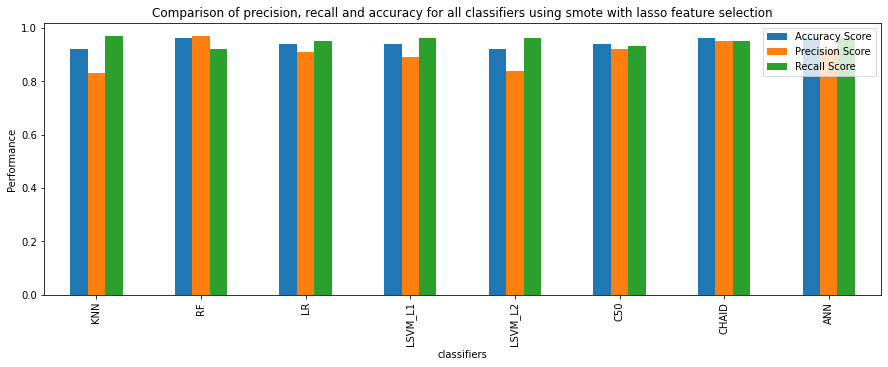

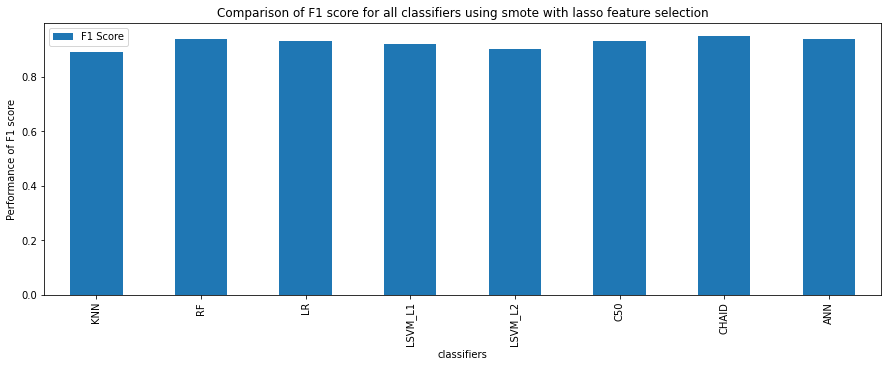

In [248]:
Metrics_smote_lasso.transpose().plot.bar(xlabel='classifiers',ylabel='Performance',
                             y=['Accuracy Score','Precision Score','Recall Score'],
                             figsize=(15,5),
                             title='Comparison of precision, recall and accuracy for all classifiers using smote with lasso feature selection')
Metrics_smote_lasso.transpose().plot.bar(xlabel='classifiers',ylabel='Performance of F1 score',
                             y=['F1 Score'],
                             figsize=(15,5),
                             title='Comparison of F1 score for all classifiers using smote with lasso feature selection')



Text(0, 0.5, 'Performance')

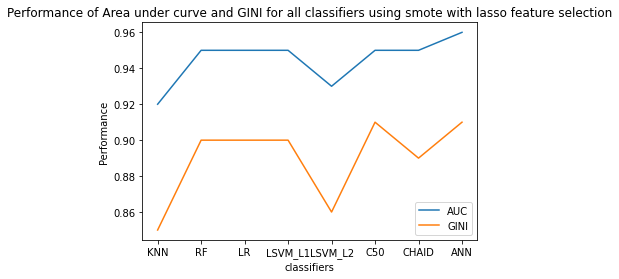

In [249]:
sns.lineplot(data=Metrics_lasso.transpose()['AUC'],label='AUC')
sns.lineplot(data=Metrics_lasso.transpose()['GINI'],label='GINI')
plt.title('Performance of Area under curve and GINI for all classifiers using smote with lasso feature selection')
plt.xlabel('classifiers')
plt.ylabel('Performance')